In [1]:
import Objects.population as pop
import Objects.sudoku as sud
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import time

from scipy.stats import t
from scipy import stats
import itertools

In [2]:
easy_board = np.array([[9,1,0,0,0,0,4,2,7],
                        [0,0,0,0,0,3,9,1,5],
                        [2,5,4,7,0,0,6,8,0],
                        [4,7,0,0,8,6,0,3,2],
                        [0,6,0,4,0,0,0,0,8],
                        [5,0,0,0,1,2,0,6,0],
                        [3,4,0,6,2,0,0,0,1],
                        [0,0,0,3,0,0,0,0,0],
                        [0,2,6,0,0,8,0,0,9]])

medium_board = np.array([[0,3,8,0,0,0,2,5,4],
                         [0,0,1,0,0,2,6,0,7],
                         [0,7,0,0,6,0,9,0,3],
                         [7,0,0,0,1,0,0,3,0],
                         [5,0,0,0,0,4,1,0,2],
                         [1,2,3,6,0,0,0,0,0],
                         [8,1,7,0,2,6,0,0,0],
                         [3,9,4,8,0,0,7,0,6],
                         [2,0,5,4,0,0,0,0,0]
                         ])

hard_board = np.array([[7,0,0,0,0,0,0,0,6],
                        [0,0,0,0,2,8,3,9,0],
                        [0,8,0,9,6,0,0,0,0],
                        [8,0,0,5,0,0,7,6,0],
                        [0,9,0,0,0,2,0,0,0],
                        [5,3,0,0,0,0,4,0,9],
                        [0,7,4,0,0,3,0,0,0],
                        [0,5,8,4,9,0,1,7,3],
                        [0,1,6,2,5,7,9,0,8]])

expert_board = np.array([[0,2,0,0,4,3,5,0,8],
                         [0,0,1,8,0,0,0,4,7],
                         [0,8,0,0,0,0,0,6,0],
                         [0,3,7,0,0,0,4,9,0],
                         [0,4,0,1,3,0,0,0,0],
                         [0,0,0,4,0,9,0,3,6],
                         [0,0,0,7,9,4,1,8,2],
                         [2,0,8,0,0,1,0,0,0],
                         [0,0,0,0,0,8,0,0,0]])

### Crrossovers tests

#### Row-wise fill

We will test all types of crossovers with one mutation type that fits that type (just to reduce computational costs) and fill initial board in the smartest way - such that each row contain all number from 1 to 9 (there are no row conflicts initially)

In [7]:
history_dict = {}
xo_types = [('multi_point', 'change-smart'),
            ('single_point', 'change-smart'),
            ('cycle', 'swap-smart'),
            ('special_xo', 'swap-smart'),
            ('single_point_tabular', 'change-smart'), 
            ('row_wise_cycle', 'swap-row'),
            ]
for j in xo_types:
    histories = []
    for i in tqdm(range(30)):
        population = pop.Population(size=1000, 
                                    initial_board=easy_board, 
                                    sudoku_arguments = {'fill_board' :'row_wise'})
        population.evolve(
            gens = 100,
            xo_prob = 0.9,
            mut_prob = 0.1,
            select_type = 'tournament',
            xo = j[0],
            mutation = j[1],
            elite_size = 200,
            swap_number = 1,
            direction = 'random',
            diversify= 'fitness-sharing',
            verbose= False,
            plateau_threshold = 10,
            invert_distances = True,
            normalize_distances = False
        )
        histories.append(population.history)
    history_dict[j] = histories

 13%|█▎        | 4/30 [05:12<33:29, 77.29s/it]

Solution found in generation 96!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 17%|█▋        | 5/30 [05:43<25:13, 60.54s/it]

Solution found in generation 51!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 20%|██        | 6/30 [05:56<17:46, 44.44s/it]

Solution found in generation 22!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [14:37<19:30, 68.86s/it]

Solution found in generation 88!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 70%|███████   | 21/30 [24:38<10:51, 72.38s/it]

Solution found in generation 80!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 83%|████████▎ | 25/30 [28:24<04:33, 54.70s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  3%|▎         | 1/30 [00:42<20:20, 42.07s/it]

Solution found in generation 61!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 10%|█         | 3/30 [02:36<22:51, 50.79s/it]

Solution found in generation 51!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 27%|██▋       | 8/30 [08:14<20:50, 56.86s/it]

Solution found in generation 20!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 30%|███       | 9/30 [09:08<19:32, 55.81s/it]

Solution found in generation 71!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [13:17<15:09, 53.52s/it]

Solution found in generation 19!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 53%|█████▎    | 16/30 [16:12<12:11, 52.23s/it]

Solution found in generation 25!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 57%|█████▋    | 17/30 [16:24<08:41, 40.10s/it]

Solution found in generation 19!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 70%|███████   | 21/30 [20:39<07:59, 53.30s/it]

Solution found in generation 40!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 73%|███████▎  | 22/30 [20:52<05:29, 41.22s/it]

Solution found in generation 21!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 10%|█         | 3/30 [03:12<27:14, 60.55s/it]

Solution found in generation 69!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [12:06<23:45, 71.27s/it]

Solution found in generation 81!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 37%|███▋      | 11/30 [12:46<19:34, 61.80s/it]

Solution found in generation 60!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 57%|█████▋    | 17/30 [19:33<13:14, 61.08s/it]

Solution found in generation 49!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 83%|████████▎ | 25/30 [29:47<05:30, 66.18s/it]

Solution found in generation 44!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 13%|█▎        | 4/30 [05:01<31:06, 71.80s/it]

Solution found in generation 72!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 57%|█████▋    | 17/30 [23:13<16:42, 77.14s/it]

Solution found in generation 69!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  7%|▋         | 2/30 [02:01<25:14, 54.10s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 27%|██▋       | 8/30 [09:08<21:35, 58.91s/it]

Solution found in generation 20!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [16:29<52:29, 157.49s/it]

Solution found in generation 53!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [18:17<20:46, 73.30s/it] 

Solution found in generation 25!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 53%|█████▎    | 16/30 [20:03<10:33, 45.25s/it]

Solution found in generation 29!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


100%|██████████| 30/30 [31:40<00:00, 63.35s/it]


Solution found in generation 25!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  3%|▎         | 1/30 [00:10<05:07, 10.61s/it]

Solution found in generation 24!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  7%|▋         | 2/30 [00:24<05:48, 12.44s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 27%|██▋       | 8/30 [04:13<12:03, 32.91s/it]

Solution found in generation 46!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  7  |  9  1  2  |  8  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [05:04<09:14, 27.71s/it]

Solution found in generation 22!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [06:43<08:13, 29.00s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 60%|██████    | 18/30 [09:38<06:03, 30.28s/it]

Solution found in generation 30!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 63%|██████▎   | 19/30 [10:09<05:34, 30.41s/it]

Solution found in generation 74!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  8  |  6  2  9  |  5  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 67%|██████▋   | 20/30 [10:34<04:45, 28.59s/it]

Solution found in generation 60!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 4  2  6  |  1  5  8  |  3  7  9 


 83%|████████▎ | 25/30 [13:27<02:27, 29.58s/it]

Solution found in generation 23!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 87%|████████▋ | 26/30 [13:49<01:49, 27.38s/it]

Solution found in generation 55!

 9  1  3  |  6  8  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


100%|██████████| 30/30 [16:04<00:00, 32.14s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  4  6  7 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


In [8]:
file_name = 'test_crossovers_mutations_row_wise_fill.pkl'

with open(file_name, 'wb') as file:
    pickle.dump(history_dict, file)


In [16]:
file_name = 'test_crossovers_mutations_row_wise_fill.pkl'

with open(file_name, 'rb') as file:
    history_dict = pickle.load(file)

In [20]:
xo_types = [('multi_point', 'change-smart'),
            ('single_point', 'change-smart'),
            ('cycle', 'swap-smart'),
            ('special_xo', 'swap-smart'),
            ('single_point_tabular', 'change-smart'), 
            ('row_wise_cycle', 'swap-row'),
            ]
for j in xo_types:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"XO type: {j}, Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)
    t_st = t.ppf(0.975, 29)
    df['CI_low'] = df['mean'] - t_st*df['std']/np.sqrt(29)
    df['CI_high'] = df['mean'] + t_st*df['std']/np.sqrt(29)
    print(f"Mean fitness at the end of run: {np.round(df['mean'].iloc[-1],2)}, 95% CI: [{np.round(df['CI_low'].iloc[-1],2)}, {np.round(df['CI_high'].iloc[-1],2)}]")

XO type: ('multi_point', 'change-smart'), Percentage solved: 20.0 %
Mean fitness at the end of run: 4.13, 95% CI: [3.12, 5.15]
XO type: ('single_point', 'change-smart'), Percentage solved: 30.0 %
Mean fitness at the end of run: 3.17, 95% CI: [2.23, 4.1]
XO type: ('cycle', 'swap-smart'), Percentage solved: 16.67 %
Mean fitness at the end of run: 4.3, 95% CI: [3.33, 5.27]
XO type: ('special_xo', 'swap-smart'), Percentage solved: 6.67 %
Mean fitness at the end of run: 5.1, 95% CI: [4.0, 6.2]
XO type: ('single_point_tabular', 'change-smart'), Percentage solved: 20.0 %
Mean fitness at the end of run: 3.2, 95% CI: [2.35, 4.05]
XO type: ('row_wise_cycle', 'swap-row'), Percentage solved: 36.67 %
Mean fitness at the end of run: 2.5, 95% CI: [1.69, 3.31]


XO Type: multi_point, Mutation Type: change-smart,  Percentage solved: 20.0 %


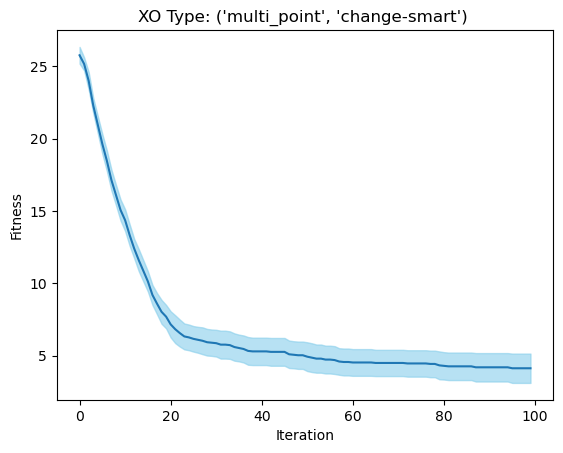

XO Type: single_point, Mutation Type: change-smart,  Percentage solved: 30.0 %


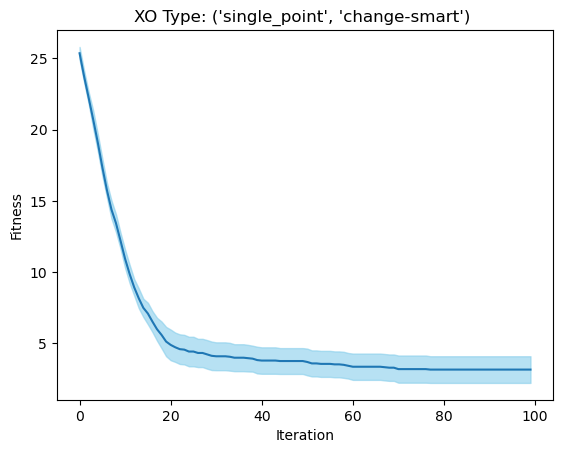

XO Type: cycle, Mutation Type: swap-smart,  Percentage solved: 16.67 %


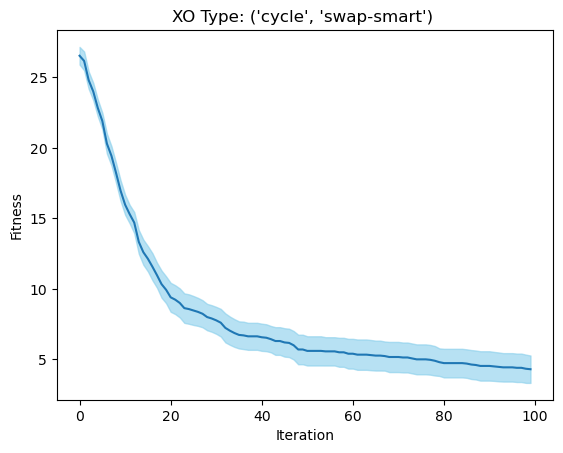

XO Type: special_xo, Mutation Type: swap-smart,  Percentage solved: 6.67 %


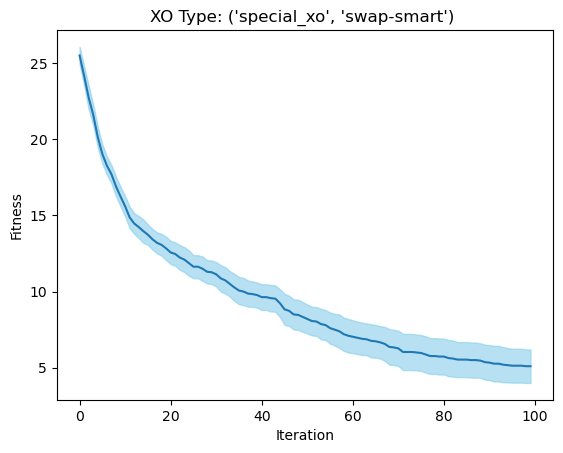

XO Type: single_point_tabular, Mutation Type: change-smart,  Percentage solved: 20.0 %


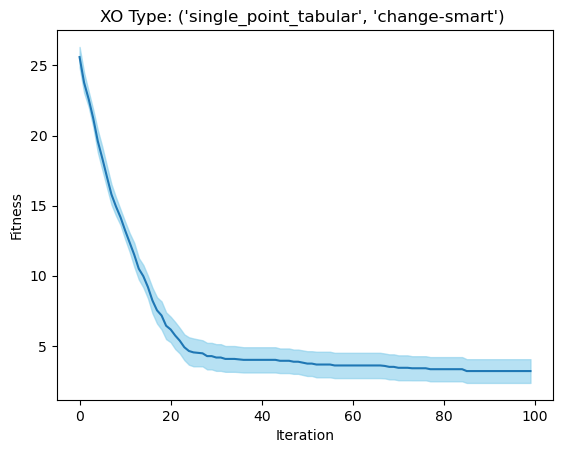

XO Type: row_wise_cycle, Mutation Type: swap-row,  Percentage solved: 36.67 %


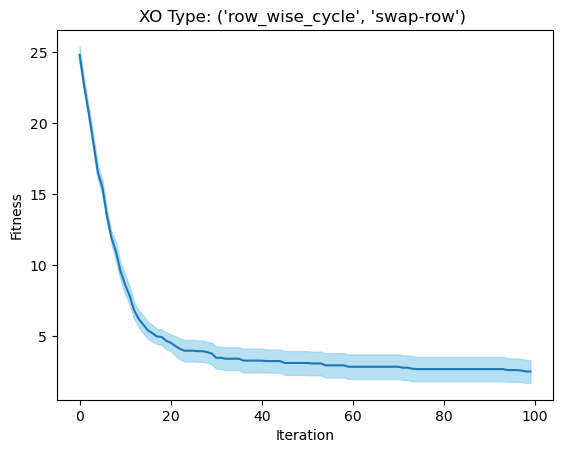

In [21]:
xo_types = [('multi_point', 'change-smart'),
            ('single_point', 'change-smart'),
            ('cycle', 'swap-smart'),
            ('special_xo', 'swap-smart'),
            ('single_point_tabular', 'change-smart'), 
            ('row_wise_cycle', 'swap-row'),
            ]

for j in xo_types:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"XO Type: {j[0]}, Mutation Type: {j[1]},  Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)
    t_st = t.ppf(0.975, 29)
    df['CI_low'] = df['mean'] - t_st*df['std']/np.sqrt(29)
    df['CI_high'] = df['mean'] + t_st*df['std']/np.sqrt(29)
    plt.fill_between(df.index, df['CI_low'], df['CI_high'], color='skyblue', alpha=.6)
    plt.plot(df['mean'])
    # plt.plot(pd.DataFrame(i).T[0])
    plt.title(f"XO Type: {j} ")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()

In [22]:
xo_types = [('cycle', 'swap-smart'),
            ('special_xo', 'swap-smart'),
            ('single_point_tabular', 'change-smart'), 
            ('row_wise_cycle', 'swap-row'),
            ('multi_point', 'change-smart'),
            ('single_point', 'change-smart')
            ]

crossovers = ['cycle', 'special_xo', 'single_point_tabular', 'row_wise_cycle', 'multi_point', 'single_point']
pairs = list(itertools.combinations(crossovers,2))

# take data from last run
df_last_step = pd.DataFrame(columns=['cycle','special_xo','single_point_tabular', 'row_wise_cycle','multi_point','single_point'])
for j in xo_types:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    df_last_step[j[0]] = df.iloc[-1]


for i in pairs:
    t_stat, p_value = stats.ttest_ind(df_last_step[i[0]], df_last_step[i[1]], equal_var=False)

    print(f"Test means equality for {i[0]} and {i[1]}")
    print("t-statistic:", np.round(t_stat,3))
    print("p-value:", np.round(p_value,4))
    if p_value < 0.05:
        print(f"Statistically significant difference between {i[0]} and {i[1]}")
    print('\n')


Test means equality for cycle and special_xo
t-statistic: -1.116
p-value: 0.2691


Test means equality for cycle and single_point_tabular
t-statistic: 1.747
p-value: 0.0861


Test means equality for cycle and row_wise_cycle
t-statistic: 2.915
p-value: 0.0051
Statistically significant difference between cycle and row_wise_cycle


Test means equality for cycle and multi_point
t-statistic: 0.243
p-value: 0.809


Test means equality for cycle and single_point
t-statistic: 1.718
p-value: 0.0911


Test means equality for special_xo and single_point_tabular
t-statistic: 2.804
p-value: 0.007
Statistically significant difference between special_xo and single_point_tabular


Test means equality for special_xo and row_wise_cycle
t-statistic: 3.902
p-value: 0.0003
Statistically significant difference between special_xo and row_wise_cycle


Test means equality for special_xo and multi_point
t-statistic: 1.323
p-value: 0.1909


Test means equality for special_xo and single_point
t-statistic: 2.741
p

From statistical tests we see that with that configuration row_wise cycle is better, but not statistically significant in most cases. However, its not a surprise as the board was defined in a way that it should solve it

#### Whole board fill

Let's test 4 crossovers but by filling full board, not row wise, with numbers to fit the whole board distribution. The reason we do that is because the row-wise initialization really biases the problem and make it more oriented to row-wise crossover and mutation - maybe we can go more general and achieve same results

In [9]:
history_dict = {}
xo_types = [('multi_point', 'change-smart'),
            ('single_point', 'change-smart'),
            ('cycle', 'swap-smart'),
            ('special_xo', 'swap-smart'),
            ('single_point_tabular', 'change-smart'), 
            ('row_wise_cycle', 'swap-row')
            ]
for j in xo_types:
    histories = []
    for i in tqdm(range(30)):
        population = pop.Population(size=1000, 
                                    initial_board=easy_board
                                    )
        population.evolve(
            gens = 100,
            xo_prob = 0.9,
            mut_prob = 0.1,
            select_type = 'tournament',
            xo = j[0],
            mutation = j[1],
            elite_size = 200,
            swap_number = 1,
            direction = 'random',
            diversify = 'fitness-sharing',
            verbose = False,
            plateau_threshold = 10,
            invert_distances = True,
            normalize_distances = False
        )
        histories.append(population.history)
    history_dict[j] = histories

 43%|████▎     | 13/30 [08:18<09:01, 31.84s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 50%|█████     | 15/30 [09:16<07:18, 29.25s/it]

Solution found in generation 40!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 37%|███▋      | 11/30 [07:15<10:44, 33.92s/it]

Solution found in generation 28!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 60%|██████    | 18/30 [11:35<06:15, 31.25s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  7%|▋         | 2/30 [01:02<13:38, 29.22s/it]

Solution found in generation 46!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 20%|██        | 6/30 [03:49<15:51, 39.63s/it]

Solution found in generation 87!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [06:24<11:57, 35.87s/it]

Solution found in generation 49!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 67%|██████▋   | 20/30 [13:16<05:50, 35.04s/it]

Solution found in generation 27!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 70%|███████   | 21/30 [13:37<04:35, 30.66s/it]

Solution found in generation 51!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  7%|▋         | 2/30 [00:57<12:01, 25.78s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 17%|█▋        | 5/30 [03:20<17:48, 42.73s/it]

Solution found in generation 97!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 37%|███▋      | 11/30 [07:27<11:27, 36.20s/it]

Solution found in generation 30!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 50%|█████     | 15/30 [10:04<08:48, 35.21s/it]

Solution found in generation 41!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 83%|████████▎ | 25/30 [18:00<03:35, 43.13s/it]

Solution found in generation 81!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 87%|████████▋ | 26/30 [18:23<02:29, 37.34s/it]

Solution found in generation 57!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


100%|██████████| 30/30 [21:08<00:00, 42.28s/it]


In [18]:
file_name = 'test_crossovers_mutations_random_fill.pkl'

with open(file_name, 'wb') as file:
    pickle.dump(history_dict, file)

In [9]:
file_name = 'test_crossovers_mutations_random_fill.pkl'

with open(file_name, 'rb') as file:
    history_dict = pickle.load(file)

In [15]:
xo_types = [('multi_point', 'change-smart'),
            ('single_point', 'change-smart'),
            ('cycle', 'swap-smart'),
            ('special_xo', 'swap-smart'),
            ('single_point_tabular', 'change-smart'),
            ('row_wise_cycle', 'swap-row')
            ]

for j in xo_types:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"XO type: {j}, Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)
    t_st = t.ppf(0.975, 29)
    df['CI_low'] = df['mean'] - t_st*df['std']/np.sqrt(29)
    df['CI_high'] = df['mean'] + t_st*df['std']/np.sqrt(29)
    print(f"Mean fitness at the end of run: {np.round(df['mean'].iloc[-1],2)}, 95% CI: [{np.round(df['CI_low'].iloc[-1],2)}, {np.round(df['CI_high'].iloc[-1],2)}]")

XO type: ('multi_point', 'change-smart'), Percentage solved: 6.67 %
Mean fitness at the end of run: 7.83, 95% CI: [6.28, 9.39]
XO type: ('single_point', 'change-smart'), Percentage solved: 6.67 %
Mean fitness at the end of run: 5.33, 95% CI: [4.19, 6.48]
XO type: ('cycle', 'swap-smart'), Percentage solved: 16.67 %
Mean fitness at the end of run: 4.17, 95% CI: [3.1, 5.24]
XO type: ('special_xo', 'swap-smart'), Percentage solved: 0.0 %
Mean fitness at the end of run: 10.23, 95% CI: [8.93, 11.54]
XO type: ('single_point_tabular', 'change-smart'), Percentage solved: 23.33 %
Mean fitness at the end of run: 3.97, 95% CI: [2.9, 5.03]
XO type: ('row_wise_cycle', 'swap-row'), Percentage solved: 0.0 %
Mean fitness at the end of run: 9.9, 95% CI: [8.28, 11.52]


XO Type: multi_point, Mutation Type: change-smart,  Percentage solved: 6.67 %


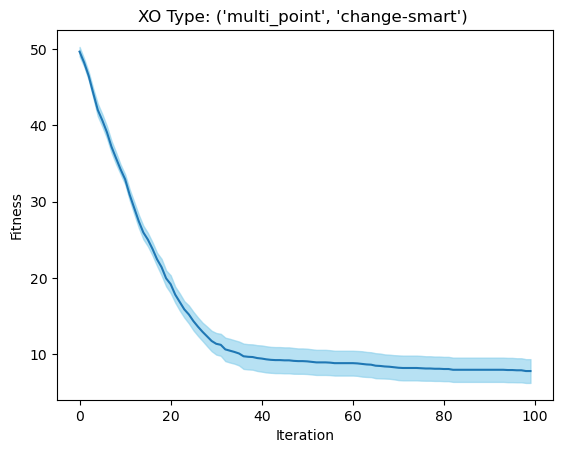

XO Type: single_point, Mutation Type: change-smart,  Percentage solved: 6.67 %


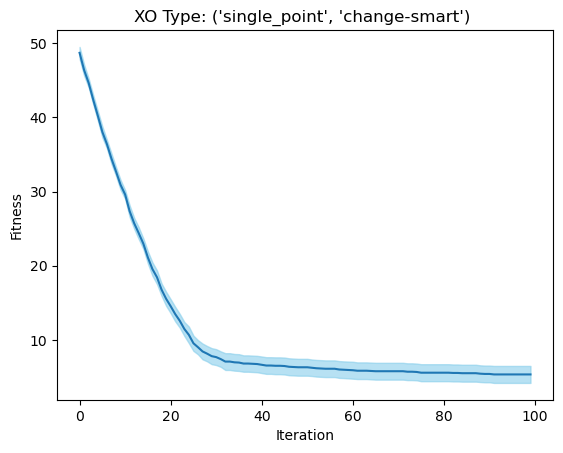

XO Type: cycle, Mutation Type: swap-smart,  Percentage solved: 16.67 %


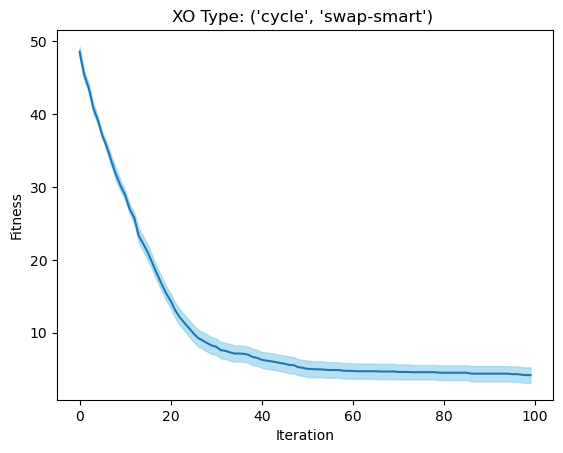

XO Type: special_xo, Mutation Type: swap-smart,  Percentage solved: 0.0 %


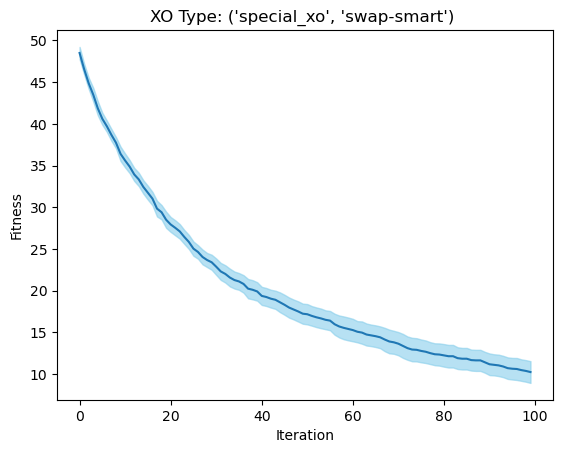

XO Type: single_point_tabular, Mutation Type: change-smart,  Percentage solved: 23.33 %


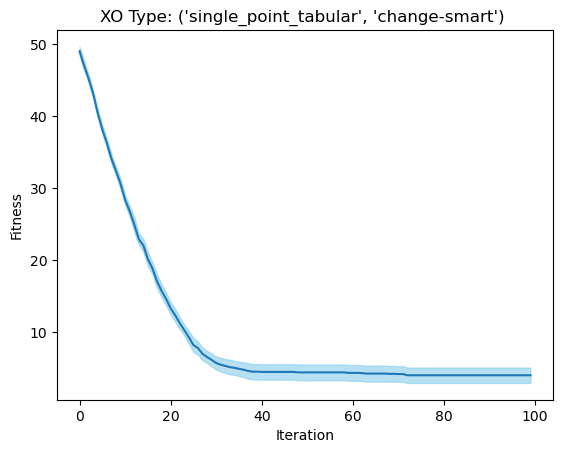

XO Type: row_wise_cycle, Mutation Type: swap-row,  Percentage solved: 0.0 %


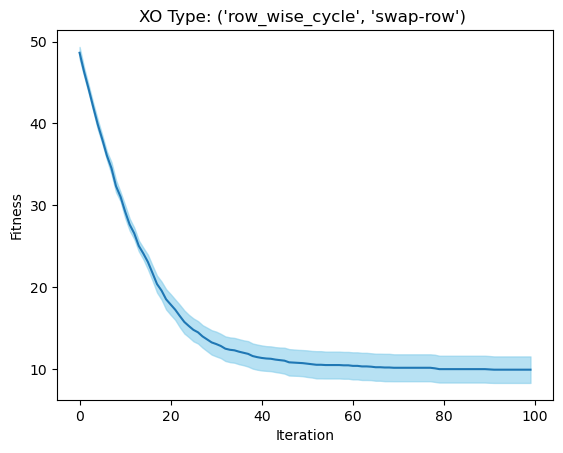

In [16]:
for j in xo_types:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"XO Type: {j[0]}, Mutation Type: {j[1]},  Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)
    t_st = t.ppf(0.975, 29)
    df['CI_low'] = df['mean'] - t_st*df['std']/np.sqrt(29)
    df['CI_high'] = df['mean'] + t_st*df['std']/np.sqrt(29)
    plt.fill_between(df.index, df['CI_low'], df['CI_high'], color='skyblue', alpha=.6)
    plt.plot(df['mean'])
    # plt.plot(pd.DataFrame(i).T[0])
    plt.title(f"XO Type: {j} ")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()

In [17]:
xo_types = [('multi_point', 'change-smart'),
            ('single_point', 'change-smart'),
            ('cycle', 'swap-smart'),
            ('special_xo', 'swap-smart'),
            ('single_point_tabular', 'change-smart'),
            ('row_wise_cycle', 'swap-row')
            ]

crossovers = ['single_point_tabular','cycle', 'special_xo', 'row_wise_cycle']
pairs = list(itertools.combinations(crossovers,2))

# take data from last run
df_last_step = pd.DataFrame(columns=['single_point_tabular', 'cycle','special_xo', 'row_wise_cycle'])
for j in xo_types:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    df_last_step[j[0]] = df.iloc[-1]


for i in pairs:
    t_stat, p_value = stats.ttest_ind(df_last_step[i[0]], df_last_step[i[1]], equal_var=False)

    print(f"Test means equality for {i[0]} and {i[1]}")
    print("t-statistic:", np.round(t_stat,3))
    print("p-value:", np.round(p_value,4))
    if p_value < 0.05:
        print(f"Statistically significant difference between {i[0]} and {i[1]}")
    print('\n')

Test means equality for single_point_tabular and cycle
t-statistic: -0.271
p-value: 0.7872


Test means equality for single_point_tabular and special_xo
t-statistic: -7.621
p-value: 0.0
Statistically significant difference between single_point_tabular and special_xo


Test means equality for single_point_tabular and row_wise_cycle
t-statistic: -6.268
p-value: 0.0
Statistically significant difference between single_point_tabular and row_wise_cycle


Test means equality for cycle and special_xo
t-statistic: -7.357
p-value: 0.0
Statistically significant difference between cycle and special_xo


Test means equality for cycle and row_wise_cycle
t-statistic: -6.044
p-value: 0.0
Statistically significant difference between cycle and row_wise_cycle


Test means equality for special_xo and row_wise_cycle
t-statistic: 0.328
p-value: 0.7441




For the further tests we will use single_point_tabular crossover as it works better with more general settings - without row specific initialization. And with that initialization it's mean fitness at the end of run is significantly different from means of the other crossovers.

### Mutation tests

Let us check which mutations work good with that crossover

In [ ]:
mutations = ['swap', 'swap-smart', 'change', 'change-smart']

history_dict = {}
for j in mutations:
    histories = []
    for i in tqdm(range(30)):
        population = pop.Population(size=1000, initial_board=easy_board)
        population.evolve(
            gens = 100,
            xo_prob = 0.9,
            mut_prob = 0.1,
            select_type = 'tournament',
            xo = 'single_point_tabular',
            mutation = j,
            elite_size = 200,
            swap_number = 1,
            direction = 'random',
            diversify = 'fitness-sharing',
            verbose= False,
            plateau_threshold=10,
            invert_distances=True,
            normalize_distances=False
        )
        histories.append(population.history)
    history_dict[j] = histories

In [16]:
file_name = 'test_mutations.pkl'

with open(file_name, 'wb') as file:
    pickle.dump(history_dict, file)

In [58]:
file_name = 'Runs history/test_mutations.pkl'
with open(file_name, 'rb') as file:
    history_dict = pickle.load(file)

In [59]:
mutations = ['swap', 'swap-smart', 'change', 'change-smart']

for j in mutations:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"Mutation type: {j}, Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)
    t_st = t.ppf(0.975, 29)
    df['CI_low'] = df['mean'] - t_st*df['std']/np.sqrt(29)
    df['CI_high'] = df['mean'] + t_st*df['std']/np.sqrt(29)
    print(f"Mean fitness at the end of run: {np.round(df['mean'].iloc[-1],2)}, 95% CI: [{np.round(df['CI_low'].iloc[-1],2)}, {np.round(df['CI_high'].iloc[-1],2)}]")

Mutation type: swap, Percentage solved: 6.67 %
Mean fitness at the end of run: 6.03, 95% CI: [4.76, 7.31]
Mutation type: swap-smart, Percentage solved: 23.33 %
Mean fitness at the end of run: 3.9, 95% CI: [2.82, 4.98]
Mutation type: change, Percentage solved: 6.67 %
Mean fitness at the end of run: 7.67, 95% CI: [6.43, 8.9]
Mutation type: change-smart, Percentage solved: 23.33 %
Mean fitness at the end of run: 3.97, 95% CI: [2.9, 5.03]


Mutation Type: swap,  Percentage solved: 6.67 %


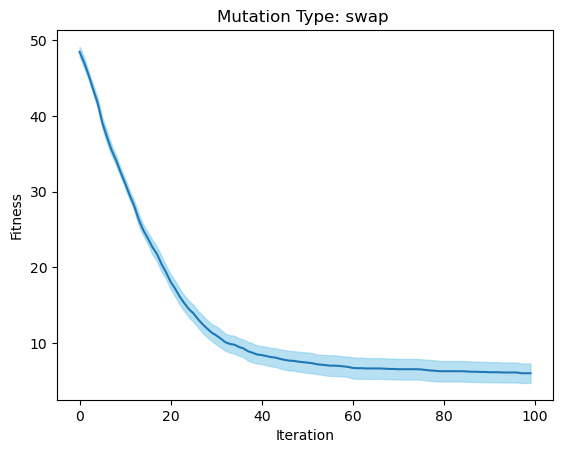

Mutation Type: swap-smart,  Percentage solved: 23.33 %


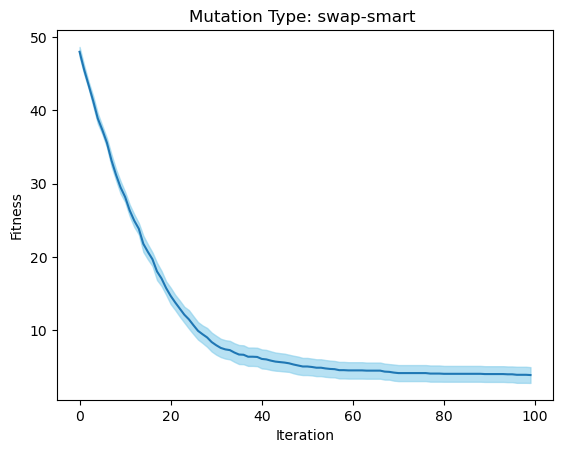

Mutation Type: change,  Percentage solved: 6.67 %


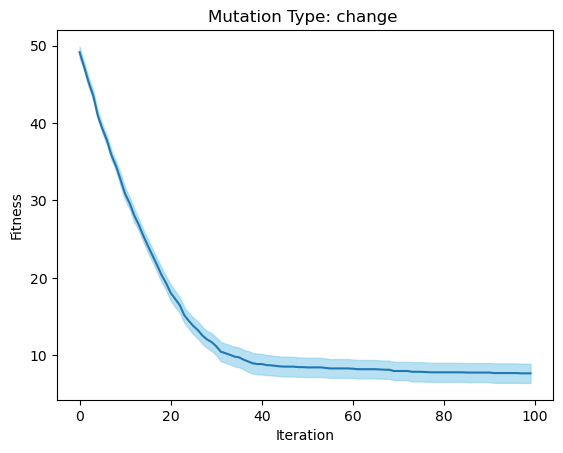

Mutation Type: change-smart,  Percentage solved: 23.33 %


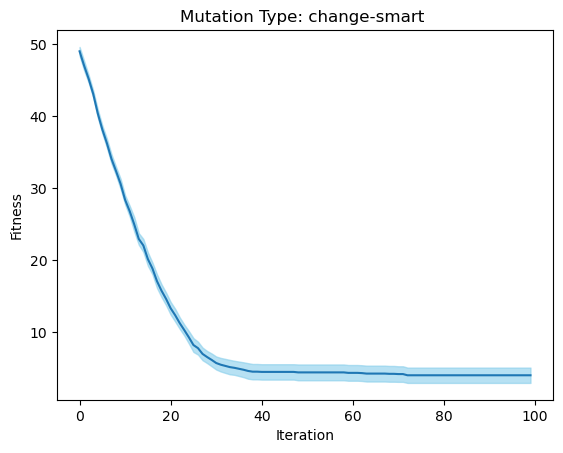

In [60]:
for j in mutations:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"Mutation Type: {j},  Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)
    t_st = t.ppf(0.975, 29)
    df['CI_low'] = df['mean'] - t_st*df['std']/np.sqrt(29)
    df['CI_high'] = df['mean'] + t_st*df['std']/np.sqrt(29)
    plt.fill_between(df.index, df['CI_low'], df['CI_high'], color='skyblue', alpha=.6)
    plt.plot(df['mean'])
    plt.title(f"Mutation Type: {j} ")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()

In [62]:
mutations = ['swap', 'swap-smart', 'change', 'change-smart']

pairs = list(itertools.combinations(mutations,2))

# take data from last run
df_last_step = pd.DataFrame(columns=mutations )
for j in mutations :
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    df_last_step[j] = df.iloc[-1]


for i in pairs:
    t_stat, p_value = stats.ttest_ind(df_last_step[i[0]], df_last_step[i[1]], equal_var=False)

    print(f"Test means equality for {i[0]} and {i[1]}")
    print("t-statistic:", np.round(t_stat,3))
    print("p-value:", np.round(p_value,4))
    if p_value < 0.05:
        print(f"Statistically significant difference between {i[0]} and {i[1]}")
    print('\n')

Test means equality for swap and swap-smart
t-statistic: 2.614
p-value: 0.0115
Statistically significant difference between swap and swap-smart


Test means equality for swap and change
t-statistic: -1.879
p-value: 0.0653


Test means equality for swap and change-smart
t-statistic: 2.544
p-value: 0.0137
Statistically significant difference between swap and change-smart


Test means equality for swap-smart and change
t-statistic: -4.698
p-value: 0.0
Statistically significant difference between swap-smart and change


Test means equality for swap-smart and change-smart
t-statistic: -0.09
p-value: 0.9285


Test means equality for change and change-smart
t-statistic: 4.638
p-value: 0.0
Statistically significant difference between change and change-smart




Hard to choose between swap-smart and change smart. Change smart tends to converge faster, however swap-smart lead to slightly better mean fitnees at the end. Although statistically not significant. We will use change-smart, since we value speed of convergence more in that case.

### Mutation and XO rates tests

In [ ]:
mut_crossover_rates = [(0.1, 0.9), (0.5, 0.5), (0.9, 0.1), (0.1, 0.1), (0.9,0.9)]

history_dict = {}
for j in mut_crossover_rates:
    histories = []
    for i in tqdm(range(30)):
        population = pop.Population(size=1000, initial_board=easy_board)
        population.evolve(
            gens = 100,
            mut_prob = j[0],
            xo_prob = j[1],
            select_type = 'tournament',
            xo = 'single_point_tabular',
            mutation = 'change-smart',
            elite_size = 200,
            swap_number = 1,
            direction = 'random',
            diversify = 'fitness-sharing',
            verbose= False,
            plateau_threshold=10,
            invert_distances=True,
            normalize_distances=False
        )
        histories.append(population.history)
    history_dict[j] = histories

In [31]:
file_name = 'test_mut_crossover_rates.pkl'

with open(file_name, 'wb') as file:
    pickle.dump(history_dict, file)

In [65]:
file_name = 'Runs history/test_mut_crossover_rates.pkl'
with open(file_name, 'rb') as file:
    history_dict = pickle.load(file)

In [66]:
mut_crossover_rates = [(0.1, 0.9), (0.5, 0.5), (0.9, 0.1), (0.1, 0.1), (0.9,0.9)]

for j in mut_crossover_rates:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"Mutataion rate: {j[0]}, xo rate: {j[1]}, Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)
    t_st = t.ppf(0.975, 29)
    df['CI_low'] = df['mean'] - t_st*df['std']/np.sqrt(29)
    df['CI_high'] = df['mean'] + t_st*df['std']/np.sqrt(29)
    print(f"Mean fitness at the end of run: {np.round(df['mean'].iloc[-1],2)}, 95% CI: [{np.round(df['CI_low'].iloc[-1],2)}, {np.round(df['CI_high'].iloc[-1],2)}]")

    

Mutataion rate: 0.1, xo rate: 0.9, Percentage solved: 20.0 %
Mean fitness at the end of run: 4.03, 95% CI: [2.87, 5.2]
Mutataion rate: 0.5, xo rate: 0.5, Percentage solved: 36.67 %
Mean fitness at the end of run: 2.4, 95% CI: [1.54, 3.26]
Mutataion rate: 0.9, xo rate: 0.1, Percentage solved: 0.0 %
Mean fitness at the end of run: 14.5, 95% CI: [11.5, 17.5]
Mutataion rate: 0.1, xo rate: 0.1, Percentage solved: 0.0 %
Mean fitness at the end of run: 19.27, 95% CI: [17.16, 21.38]
Mutataion rate: 0.9, xo rate: 0.9, Percentage solved: 83.33 %
Mean fitness at the end of run: 0.6, 95% CI: [0.04, 1.16]


Mutataion rate: 0.1, xo rate: 0.9, Percentage solved: 20.0 %


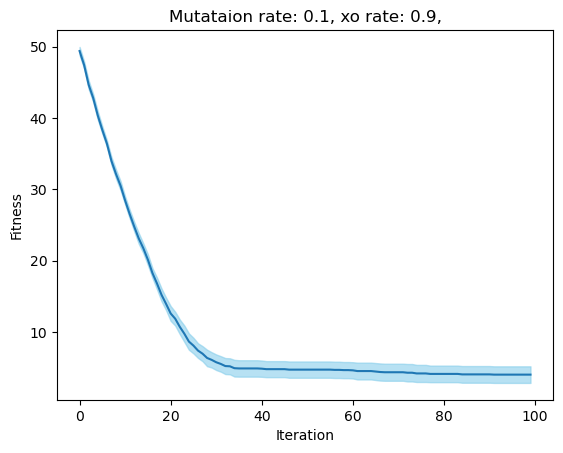

Mutataion rate: 0.5, xo rate: 0.5, Percentage solved: 36.67 %


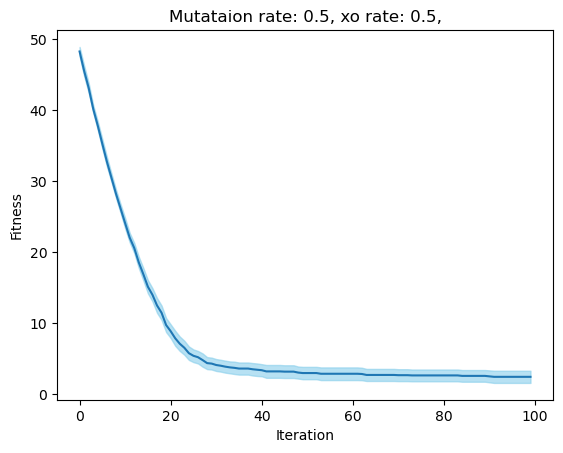

Mutataion rate: 0.9, xo rate: 0.1, Percentage solved: 0.0 %


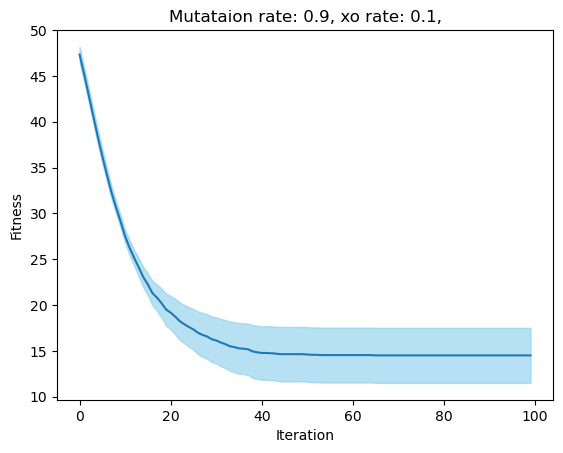

Mutataion rate: 0.1, xo rate: 0.1, Percentage solved: 0.0 %


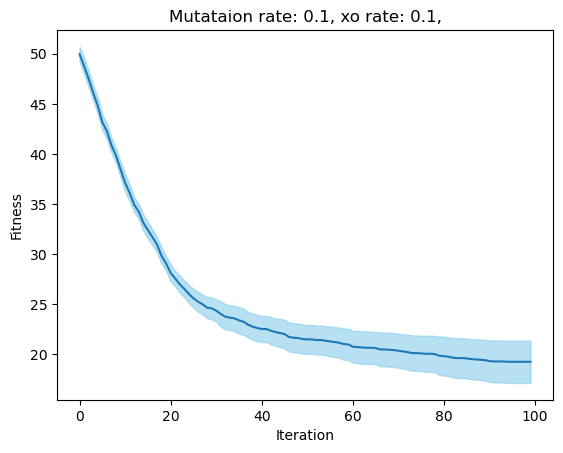

Mutataion rate: 0.9, xo rate: 0.9, Percentage solved: 83.33 %


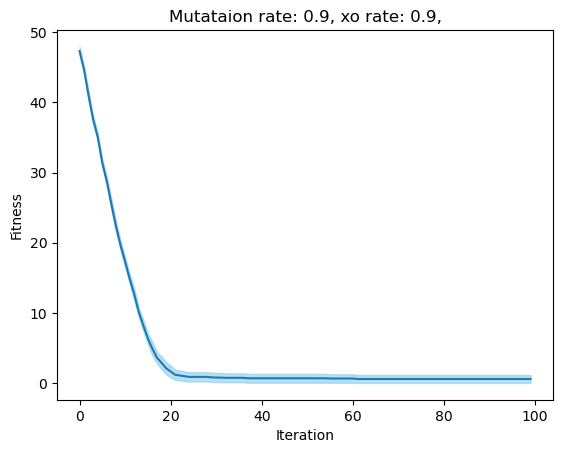

In [67]:
for j in mut_crossover_rates:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"Mutataion rate: {j[0]}, xo rate: {j[1]}, Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)
    t_st = t.ppf(0.975, 29)
    df['CI_low'] = df['mean'] - t_st*df['std']/np.sqrt(29)
    df['CI_high'] = df['mean'] + t_st*df['std']/np.sqrt(29)
    plt.fill_between(df.index, df['CI_low'], df['CI_high'], color='skyblue', alpha=.6)
    plt.plot(df['mean'])
    plt.title(f"Mutataion rate: {j[0]}, xo rate: {j[1]},")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()

In [68]:
mut_crossover_rates = [(0.1, 0.9), (0.5, 0.5), (0.9, 0.1), (0.1, 0.1), (0.9,0.9)]

pairs = list(itertools.combinations(mut_crossover_rates,2))

# take data from last run
df_last_step = pd.DataFrame(columns= mut_crossover_rates )
for j in mut_crossover_rates:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    df_last_step[j] = df.iloc[-1]


for i in pairs:
    t_stat, p_value = stats.ttest_ind(df_last_step[i[0]], df_last_step[i[1]], equal_var=False)

    print(f"Test means equality for {i[0]} and {i[1]}")
    print("t-statistic:", np.round(t_stat,3))
    print("p-value:", np.round(p_value,4))
    if p_value < 0.05:
        print(f"Statistically significant difference between {i[0]} and {i[1]}")
    print('\n')

Test means equality for (0.1, 0.9) and (0.5, 0.5)
t-statistic: 2.312
p-value: 0.0247
Statistically significant difference between (0.1, 0.9) and (0.5, 0.5)


Test means equality for (0.1, 0.9) and (0.9, 0.1)
t-statistic: -6.645
p-value: 0.0
Statistically significant difference between (0.1, 0.9) and (0.9, 0.1)


Test means equality for (0.1, 0.9) and (0.1, 0.1)
t-statistic: -12.934
p-value: 0.0
Statistically significant difference between (0.1, 0.9) and (0.1, 0.1)


Test means equality for (0.1, 0.9) and (0.9, 0.9)
t-statistic: 5.443
p-value: 0.0
Statistically significant difference between (0.1, 0.9) and (0.9, 0.9)


Test means equality for (0.5, 0.5) and (0.9, 0.1)
t-statistic: -7.92
p-value: 0.0
Statistically significant difference between (0.5, 0.5) and (0.9, 0.1)


Test means equality for (0.5, 0.5) and (0.1, 0.1)
t-statistic: -15.145
p-value: 0.0
Statistically significant difference between (0.5, 0.5) and (0.1, 0.1)


Test means equality for (0.5, 0.5) and (0.9, 0.9)
t-statistic:

High mutation and xo rates work the best, and mean futness is significantly better. It was unexpected and a bit controversial to what we normally have when we use genetic algorithms. However, in that case it works, because mutation is not only maintaining diversity and helps to explore search space, but being smart helps to achieve convergence.

### Selections tests

In [37]:
selections = ['roulette', 'tournament']

history_dict = {}
for j in selections:
    histories = []
    for i in tqdm(range(30)):
        population = pop.Population(size=1000, initial_board=easy_board)
        population.evolve(
            gens = 100,
            mut_prob = 0.9,
            xo_prob = 0.9,
            select_type = j,
            xo = 'single_point_tabular',
            mutation = 'change-smart',
            elite_size = 200,
            swap_number = 1,
            direction = 'random',
            diversify = 'fitness-sharing',
            verbose= False,
            plateau_threshold=10,
            invert_distances=True,
            normalize_distances=False
        )
        histories.append(population.history)
    history_dict[j] = histories

  3%|▎         | 1/30 [00:18<08:56, 18.51s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  7%|▋         | 2/30 [00:38<09:01, 19.35s/it]

Solution found in generation 38!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 10%|█         | 3/30 [00:55<08:11, 18.20s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 13%|█▎        | 4/30 [01:11<07:29, 17.28s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 17%|█▋        | 5/30 [01:26<06:59, 16.76s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 20%|██        | 6/30 [01:44<06:48, 17.00s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 23%|██▎       | 7/30 [02:01<06:31, 17.02s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 27%|██▋       | 8/30 [02:20<06:31, 17.78s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 30%|███       | 9/30 [02:41<06:33, 18.72s/it]

Solution found in generation 40!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [03:00<06:12, 18.65s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 37%|███▋      | 11/30 [03:15<05:34, 17.62s/it]

Solution found in generation 30!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 40%|████      | 12/30 [03:32<05:13, 17.44s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [03:49<04:55, 17.37s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 47%|████▋     | 14/30 [04:05<04:28, 16.80s/it]

Solution found in generation 30!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 50%|█████     | 15/30 [04:22<04:12, 16.84s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 53%|█████▎    | 16/30 [04:38<03:54, 16.73s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 57%|█████▋    | 17/30 [04:55<03:39, 16.90s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 60%|██████    | 18/30 [05:13<03:25, 17.15s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 63%|██████▎   | 19/30 [05:29<03:02, 16.62s/it]

Solution found in generation 30!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 67%|██████▋   | 20/30 [05:44<02:42, 16.29s/it]

Solution found in generation 30!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 70%|███████   | 21/30 [06:02<02:32, 16.91s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 73%|███████▎  | 22/30 [06:19<02:13, 16.73s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 77%|███████▋  | 23/30 [06:37<01:59, 17.11s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 80%|████████  | 24/30 [06:51<01:37, 16.31s/it]

Solution found in generation 28!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 83%|████████▎ | 25/30 [07:07<01:20, 16.19s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 87%|████████▋ | 26/30 [07:23<01:04, 16.19s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 90%|█████████ | 27/30 [07:39<00:48, 16.09s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 93%|█████████▎| 28/30 [07:55<00:32, 16.04s/it]

Solution found in generation 30!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 97%|█████████▋| 29/30 [08:13<00:16, 16.47s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


100%|██████████| 30/30 [08:31<00:00, 17.04s/it]


Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  3%|▎         | 1/30 [00:12<06:12, 12.85s/it]

Solution found in generation 25!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  7%|▋         | 2/30 [00:26<06:14, 13.37s/it]

Solution found in generation 26!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 13%|█▎        | 4/30 [01:45<12:05, 27.90s/it]

Solution found in generation 26!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 20%|██        | 6/30 [03:00<12:17, 30.72s/it]

Solution found in generation 20!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 23%|██▎       | 7/30 [03:11<09:15, 24.15s/it]

Solution found in generation 19!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 27%|██▋       | 8/30 [03:23<07:27, 20.32s/it]

Solution found in generation 23!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 30%|███       | 9/30 [03:34<06:03, 17.30s/it]

Solution found in generation 22!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [03:43<04:56, 14.80s/it]

Solution found in generation 19!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 37%|███▋      | 11/30 [03:52<04:06, 12.97s/it]

Solution found in generation 19!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 40%|████      | 12/30 [04:01<03:35, 11.99s/it]

Solution found in generation 19!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [04:12<03:19, 11.71s/it]

Solution found in generation 21!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 47%|████▋     | 14/30 [04:24<03:04, 11.56s/it]

Solution found in generation 22!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 50%|█████     | 15/30 [04:36<02:55, 11.71s/it]

Solution found in generation 25!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 53%|█████▎    | 16/30 [04:51<02:57, 12.69s/it]

Solution found in generation 28!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 57%|█████▋    | 17/30 [05:00<02:30, 11.57s/it]

Solution found in generation 18!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 63%|██████▎   | 19/30 [06:10<03:58, 21.68s/it]

Solution found in generation 24!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 67%|██████▋   | 20/30 [06:22<03:06, 18.66s/it]

Solution found in generation 22!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 73%|███████▎  | 22/30 [07:45<03:47, 28.41s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 77%|███████▋  | 23/30 [07:56<02:41, 23.02s/it]

Solution found in generation 21!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 80%|████████  | 24/30 [08:08<01:57, 19.64s/it]

Solution found in generation 23!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 83%|████████▎ | 25/30 [08:18<01:23, 16.72s/it]

Solution found in generation 20!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 90%|█████████ | 27/30 [10:24<01:48, 36.19s/it]

Solution found in generation 20!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 93%|█████████▎| 28/30 [10:40<01:00, 30.13s/it]

Solution found in generation 19!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 97%|█████████▋| 29/30 [10:56<00:25, 25.93s/it]

Solution found in generation 19!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


100%|██████████| 30/30 [11:13<00:00, 22.45s/it]

Solution found in generation 20!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


In [38]:
file_name = 'test_selections.pkl'

with open(file_name, 'wb') as file:
    pickle.dump(history_dict, file)

In [69]:
file_name = 'Runs history/test_selections.pkl'
with open(file_name, 'rb') as file:
    history_dict = pickle.load(file)

In [70]:
selections = ['roulette', 'tournament']

for j in selections:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"Selection Type: {j}, Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)
    t_st = t.ppf(0.975, 29)
    df['CI_low'] = df['mean'] - t_st*df['std']/np.sqrt(29)
    df['CI_high'] = df['mean'] + t_st*df['std']/np.sqrt(29)
    print(f"Mean fitness at the end of run: {np.round(df['mean'].iloc[-1],2)}, 95% CI: [{np.round(df['CI_low'].iloc[-1],2)}, {np.round(df['CI_high'].iloc[-1],2)}]")

Selection Type: roulette, Percentage solved: 100.0 %
Mean fitness at the end of run: 0.0, 95% CI: [0.0, 0.0]
Selection Type: tournament, Percentage solved: 83.33 %
Mean fitness at the end of run: 0.47, 95% CI: [0.04, 0.89]


Selection Type: roulette, Percentage solved: 100.0 %


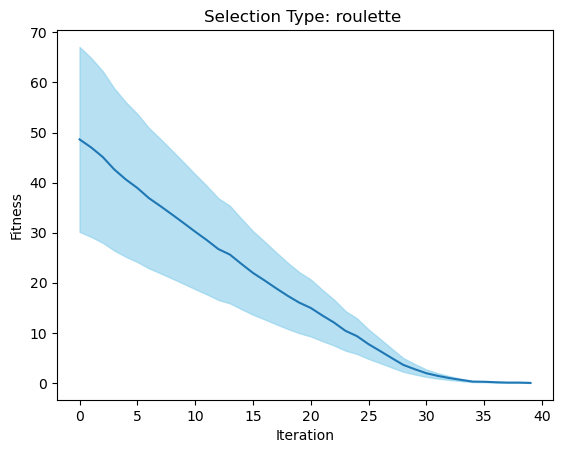

Selection Type: tournament, Percentage solved: 83.33 %


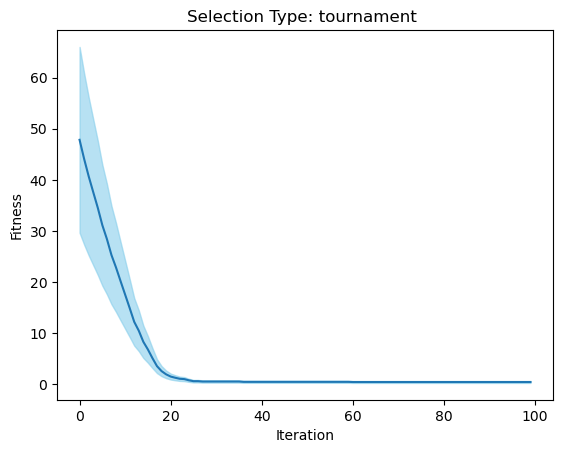

In [71]:
for j in selections:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"Selection Type: {j}, Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    df['std'] = df.mean(axis=1)
    t_st = t.ppf(0.975, 29)
    df['CI_low'] = df['mean'] - t_st*df['std']/np.sqrt(29)
    df['CI_high'] = df['mean'] + t_st*df['std']/np.sqrt(29)
    plt.fill_between(df.index, df['CI_low'], df['CI_high'], color='skyblue', alpha=.6)
    plt.plot(df['mean'])
    plt.title(f"Selection Type: {j} ")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()

In [72]:
selections = ['roulette', 'tournament']

pairs = list(itertools.combinations(selections,2))

# take data from last run
df_last_step = pd.DataFrame(columns= selections )
for j in selections:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    df_last_step[j] = df.iloc[-1]


for i in pairs:
    t_stat, p_value = stats.ttest_ind(df_last_step[i[0]], df_last_step[i[1]], equal_var=False)

    print(f"Test means equality for {i[0]} and {i[1]}")
    print("t-statistic:", np.round(t_stat,3))
    print("p-value:", np.round(p_value,4))
    if p_value < 0.05:
        print(f"Statistically significant difference between {i[0]} and {i[1]}")
    print('\n')

Test means equality for roulette and tournament
t-statistic: -2.249
p-value: 0.0323
Statistically significant difference between roulette and tournament




Tournament selection works faster (coverges after around 20 iterations always), however with roulette wheel we solved sudoku in all 30 cases after around 40 iterations max. Statistical test tell us that roulette wheel mean is significantly better that tournament mean, however, is is not a surprise since roullete mean = 0 with stadard deviation of 0.

### Pop size, gens, elite

To improve speed we also need to adjust population size, number of generations and elite size. To make it a fair competition we will look for absolute average time, not to amount generations, as we know that bigger populations will require less time to reach the solution.

In [13]:
gens_size_elite = [(100, 1000, 20), #size, gens, elite
                  (100, 1000, 50),
                  (100, 1000, 10),
                  (1000, 100, 100),
                  (1000, 100, 300),
                  (500, 200, 100),
                  (500, 200, 200),
                  ]

history_dict = {}
for j in gens_size_elite:
    histories = []
    for i in tqdm(range(30)):
        start_time = time.time()

        population = pop.Population(size=j[0], initial_board=easy_board)
        population.evolve(
            gens = j[1],
            mut_prob = 0.9,
            xo_prob = 0.9,
            select_type = 'roulette',
            xo = 'single_point_tabular',
            mutation = 'change-smart',
            elite_size = j[2],
            swap_number = 1,
            direction = 'random',
            diversify = 'fitness-sharing',
            verbose= False,
            plateau_threshold=j[1]/10,
            invert_distances=True,
            normalize_distances=False
        )
        end_time = time.time()
        elapsed_time = end_time - start_time
        histories.append((population.history, elapsed_time))
    history_dict[j] = histories

  3%|▎         | 1/30 [00:25<12:32, 25.94s/it]

Solution found in generation 278!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 23%|██▎       | 7/30 [07:47<22:28, 58.61s/it]

Solution found in generation 43!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 37%|███▋      | 11/30 [12:02<16:37, 52.48s/it]

Solution found in generation 38!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [13:41<13:13, 46.70s/it]

Solution found in generation 40!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 50%|█████     | 15/30 [15:17<11:10, 44.73s/it]

Solution found in generation 213!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 53%|█████▎    | 16/30 [15:22<07:38, 32.73s/it]

Solution found in generation 63!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 63%|██████▎   | 19/30 [18:34<08:22, 45.66s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 73%|███████▎  | 22/30 [22:01<07:14, 54.35s/it]

Solution found in generation 159!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 77%|███████▋  | 23/30 [22:04<04:32, 38.91s/it]

Solution found in generation 41!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 97%|█████████▋| 29/30 [30:25<01:05, 65.92s/it]

Solution found in generation 212!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 13%|█▎        | 4/30 [04:36<24:07, 55.67s/it] 

Solution found in generation 69!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [13:15<24:23, 73.17s/it]

Solution found in generation 449!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 77%|███████▋  | 23/30 [32:28<08:30, 72.88s/it] 

Solution found in generation 42!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


100%|██████████| 30/30 [42:46<00:00, 85.56s/it] 


Solution found in generation 77!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  3%|▎         | 1/30 [00:03<01:55,  3.98s/it]

Solution found in generation 54!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  7%|▋         | 2/30 [00:06<01:24,  3.03s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 10%|█         | 3/30 [00:08<01:12,  2.68s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 17%|█▋        | 5/30 [02:13<15:38, 37.54s/it]

Solution found in generation 490!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 23%|██▎       | 7/30 [03:53<15:15, 39.82s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 27%|██▋       | 8/30 [03:58<10:35, 28.87s/it]

Solution found in generation 69!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 30%|███       | 9/30 [04:01<07:14, 20.69s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [04:07<05:22, 16.13s/it]

Solution found in generation 75!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [07:00<10:26, 36.84s/it]

Solution found in generation 73!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 50%|█████     | 15/30 [08:37<09:40, 38.68s/it]

Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 63%|██████▎   | 19/30 [14:15<12:43, 69.37s/it]

Solution found in generation 590!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 73%|███████▎  | 22/30 [17:08<07:24, 55.57s/it]

Solution found in generation 45!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 77%|███████▋  | 23/30 [17:11<04:37, 39.66s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 80%|████████  | 24/30 [18:19<04:48, 48.16s/it]

Solution found in generation 719!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 83%|████████▎ | 25/30 [18:22<02:53, 34.63s/it]

Solution found in generation 43!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 90%|█████████ | 27/30 [20:04<02:01, 40.55s/it]

Solution found in generation 259!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 93%|█████████▎| 28/30 [20:07<00:58, 29.43s/it]

Solution found in generation 47!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  3%|▎         | 1/30 [00:33<16:17, 33.70s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  7%|▋         | 2/30 [01:04<14:51, 31.84s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 10%|█         | 3/30 [01:36<14:30, 32.23s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 13%|█▎        | 4/30 [02:08<13:54, 32.08s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 17%|█▋        | 5/30 [02:46<14:09, 33.96s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 20%|██        | 6/30 [03:20<13:39, 34.16s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 23%|██▎       | 7/30 [03:54<13:01, 33.96s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 27%|██▋       | 8/30 [04:27<12:19, 33.63s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 30%|███       | 9/30 [04:53<10:59, 31.38s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [05:12<09:09, 27.48s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 37%|███▋      | 11/30 [05:33<08:07, 25.64s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 40%|████      | 12/30 [05:52<07:02, 23.48s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [06:12<06:23, 22.54s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 47%|████▋     | 14/30 [06:31<05:40, 21.31s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 50%|█████     | 15/30 [06:50<05:08, 20.60s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 53%|█████▎    | 16/30 [07:06<04:31, 19.38s/it]

Solution found in generation 29!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 57%|█████▋    | 17/30 [07:23<04:03, 18.76s/it]

Solution found in generation 30!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 60%|██████    | 18/30 [07:40<03:35, 17.97s/it]

Solution found in generation 28!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 63%|██████▎   | 19/30 [07:58<03:17, 17.98s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 67%|██████▋   | 20/30 [08:17<03:03, 18.33s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 70%|███████   | 21/30 [08:36<02:46, 18.53s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 73%|███████▎  | 22/30 [08:54<02:26, 18.34s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 77%|███████▋  | 23/30 [09:17<02:17, 19.71s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 80%|████████  | 24/30 [09:36<01:57, 19.54s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 83%|████████▎ | 25/30 [09:55<01:37, 19.41s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 87%|████████▋ | 26/30 [10:12<01:15, 18.76s/it]

Solution found in generation 30!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 90%|█████████ | 27/30 [10:31<00:56, 18.77s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 93%|█████████▎| 28/30 [10:46<00:35, 17.75s/it]

Solution found in generation 27!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 97%|█████████▋| 29/30 [11:05<00:18, 18.14s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


100%|██████████| 30/30 [11:25<00:00, 22.84s/it]


Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  3%|▎         | 1/30 [00:21<10:17, 21.30s/it]

Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  7%|▋         | 2/30 [00:42<09:49, 21.06s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 10%|█         | 3/30 [01:03<09:26, 20.99s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 13%|█▎        | 4/30 [01:25<09:24, 21.69s/it]

Solution found in generation 38!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 17%|█▋        | 5/30 [01:45<08:42, 20.90s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 20%|██        | 6/30 [02:05<08:17, 20.72s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 23%|██▎       | 7/30 [02:25<07:48, 20.39s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 27%|██▋       | 8/30 [02:47<07:43, 21.07s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 30%|███       | 9/30 [03:06<07:08, 20.41s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [03:26<06:42, 20.15s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 37%|███▋      | 11/30 [03:47<06:30, 20.54s/it]

Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 40%|████      | 12/30 [04:06<06:00, 20.04s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [04:26<05:40, 20.01s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 47%|████▋     | 14/30 [04:47<05:24, 20.28s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 50%|█████     | 15/30 [05:08<05:08, 20.59s/it]

Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 53%|█████▎    | 16/30 [05:29<04:46, 20.47s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 57%|█████▋    | 17/30 [05:49<04:24, 20.33s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 60%|██████    | 18/30 [06:09<04:02, 20.22s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 63%|██████▎   | 19/30 [06:31<03:48, 20.82s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 67%|██████▋   | 20/30 [06:51<03:25, 20.53s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 70%|███████   | 21/30 [07:13<03:09, 21.10s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 73%|███████▎  | 22/30 [07:35<02:51, 21.44s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 77%|███████▋  | 23/30 [07:56<02:27, 21.09s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 80%|████████  | 24/30 [08:18<02:08, 21.43s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 83%|████████▎ | 25/30 [08:39<01:46, 21.23s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 87%|████████▋ | 26/30 [08:59<01:23, 20.92s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 90%|█████████ | 27/30 [09:20<01:02, 20.87s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 93%|█████████▎| 28/30 [09:38<00:40, 20.15s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 97%|█████████▋| 29/30 [09:58<00:20, 20.21s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


100%|██████████| 30/30 [10:15<00:00, 20.53s/it]


Solution found in generation 29!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  3%|▎         | 1/30 [00:10<05:15, 10.89s/it]

Solution found in generation 44!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  7%|▋         | 2/30 [00:18<04:18,  9.23s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 10%|█         | 3/30 [00:56<10:03, 22.36s/it]

Solution found in generation 141!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 13%|█▎        | 4/30 [01:06<07:30, 17.33s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 17%|█▋        | 5/30 [01:14<05:45, 13.81s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 20%|██        | 6/30 [01:21<04:36, 11.51s/it]

Solution found in generation 30!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 23%|██▎       | 7/30 [01:30<04:10, 10.89s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 30%|███       | 9/30 [02:42<07:36, 21.76s/it]

Solution found in generation 38!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [02:51<05:52, 17.62s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 37%|███▋      | 11/30 [02:59<04:42, 14.86s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 40%|████      | 12/30 [03:12<04:15, 14.21s/it]

Solution found in generation 49!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [03:21<03:32, 12.52s/it]

Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 47%|████▋     | 14/30 [03:28<02:54, 10.92s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 50%|█████     | 15/30 [03:34<02:20,  9.38s/it]

Solution found in generation 25!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 53%|█████▎    | 16/30 [03:44<02:15,  9.71s/it]

Solution found in generation 42!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 57%|█████▋    | 17/30 [03:53<02:03,  9.50s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 60%|██████    | 18/30 [04:06<02:04, 10.35s/it]

Solution found in generation 48!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 63%|██████▎   | 19/30 [04:13<01:42,  9.34s/it]

Solution found in generation 30!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 67%|██████▋   | 20/30 [04:20<01:27,  8.73s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 70%|███████   | 21/30 [04:27<01:15,  8.37s/it]

Solution found in generation 31!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 73%|███████▎  | 22/30 [04:35<01:06,  8.27s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 77%|███████▋  | 23/30 [04:43<00:57,  8.16s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 80%|████████  | 24/30 [04:52<00:50,  8.45s/it]

Solution found in generation 38!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 83%|████████▎ | 25/30 [05:01<00:42,  8.43s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 87%|████████▋ | 26/30 [05:11<00:36,  9.09s/it]

Solution found in generation 41!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 90%|█████████ | 27/30 [05:20<00:26,  8.99s/it]

Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 97%|█████████▋| 29/30 [06:30<00:19, 19.70s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


100%|██████████| 30/30 [06:38<00:00, 13.30s/it]


Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  3%|▎         | 1/30 [00:09<04:44,  9.82s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  7%|▋         | 2/30 [00:20<04:46, 10.22s/it]

Solution found in generation 41!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 10%|█         | 3/30 [00:31<04:43, 10.48s/it]

Solution found in generation 43!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 13%|█▎        | 4/30 [00:40<04:17,  9.91s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 17%|█▋        | 5/30 [00:48<03:56,  9.47s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 20%|██        | 6/30 [00:59<03:53,  9.71s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 27%|██▋       | 8/30 [02:13<08:05, 22.05s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 30%|███       | 9/30 [02:22<06:16, 17.91s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 33%|███▎      | 10/30 [02:31<05:02, 15.10s/it]

Solution found in generation 38!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 37%|███▋      | 11/30 [02:41<04:19, 13.66s/it]

Solution found in generation 42!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 40%|████      | 12/30 [02:53<03:56, 13.13s/it]

Solution found in generation 46!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [03:10<04:02, 14.25s/it]

Solution found in generation 62!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 47%|████▋     | 14/30 [03:18<03:18, 12.39s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 50%|█████     | 15/30 [03:27<02:48, 11.25s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 53%|█████▎    | 16/30 [03:37<02:31, 10.80s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 57%|█████▋    | 17/30 [03:48<02:24, 11.08s/it]

Solution found in generation 46!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 60%|██████    | 18/30 [03:58<02:08, 10.67s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 63%|██████▎   | 19/30 [04:10<02:01, 11.07s/it]

Solution found in generation 48!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 67%|██████▋   | 20/30 [04:20<01:46, 10.69s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 70%|███████   | 21/30 [04:29<01:31, 10.11s/it]

Solution found in generation 36!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 73%|███████▎  | 22/30 [04:42<01:28, 11.01s/it]

Solution found in generation 52!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 77%|███████▋  | 23/30 [04:51<01:13, 10.53s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 80%|████████  | 24/30 [05:05<01:08, 11.45s/it]

Solution found in generation 53!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 83%|████████▎ | 25/30 [05:13<00:51, 10.37s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 87%|████████▋ | 26/30 [05:23<00:41, 10.30s/it]

Solution found in generation 41!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 90%|█████████ | 27/30 [05:32<00:30, 10.13s/it]

Solution found in generation 41!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 93%|█████████▎| 28/30 [05:42<00:19,  9.99s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 97%|█████████▋| 29/30 [05:50<00:09,  9.36s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


100%|██████████| 30/30 [05:59<00:00, 11.99s/it]

Solution found in generation 37!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


In [14]:
file_name = 'test_gens_size_elite.pkl'

with open(file_name, 'wb') as file:
    pickle.dump(history_dict, file)

In [73]:
file_name = 'Runs history/test_gens_size_elite.pkl'
with open(file_name, 'rb') as file:
    history_dict = pickle.load(file)

In [74]:
gens_size_elite = [(100, 1000, 20), #size, gens, elite
                  (100, 1000, 50),
                  (100, 1000, 10),
                  (1000, 100, 100),
                  (1000, 100, 300),
                  (500, 200, 100),
                  (500, 200, 200),
                  ]

for j in gens_size_elite:
    hist = [i[0] for i in history_dict[j]]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    solved = np.where(df.iloc[-1] == 0)
    print(f"Population size: {j[0]}, number of generations: {j[1]}, elite size: {j[2]}")
    print(f"Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)
    t_st = t.ppf(0.975, 29)
    df['CI_low'] = df['mean'] - t_st*df['std']/np.sqrt(29)
    df['CI_high'] = df['mean'] + t_st*df['std']/np.sqrt(29)
    print(f"Mean fitness at the end of run: {np.round(df['mean'].iloc[-1],2)}, 95% CI: [{np.round(df['CI_low'].iloc[-1],2)}, {np.round(df['CI_high'].iloc[-1],2)}]")
    times = np.array([i[1] for i in history_dict[j]])
    print(f"Mean time per run: {np.round(np.mean(times),2)}")
    print(f"Mean time per successful run: {np.round(np.mean(times[solved]),2)}, number of successful runs: {len(times[solved])}")
    print("\n")



Population size: 100, number of generations: 1000, elite size: 20
Percentage solved: 33.33 %
Mean fitness at the end of run: 2.5, 95% CI: [1.64, 3.36]
Mean time per run: 63.41
Mean time per successful run: 9.57, number of successful runs: 10


Population size: 100, number of generations: 1000, elite size: 50
Percentage solved: 13.33 %
Mean fitness at the end of run: 3.83, 95% CI: [2.92, 4.75]
Mean time per run: 85.55
Mean time per successful run: 13.05, number of successful runs: 4


Population size: 100, number of generations: 1000, elite size: 10
Percentage solved: 56.67 %
Mean fitness at the end of run: 1.87, 95% CI: [0.96, 2.77]
Mean time per run: 46.49
Mean time per successful run: 14.07, number of successful runs: 17


Population size: 1000, number of generations: 100, elite size: 100
Percentage solved: 100.0 %
Mean fitness at the end of run: 0.0, 95% CI: [0.0, 0.0]
Mean time per run: 22.84
Mean time per successful run: 22.84, number of successful runs: 30


Population size: 1000

Population size: 100, number of generations: 1000, elite size: 20, Percentage solved: 33.33 %


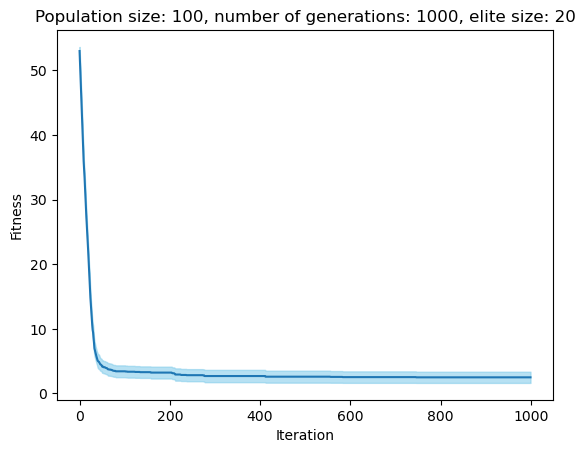

Population size: 100, number of generations: 1000, elite size: 50, Percentage solved: 13.33 %


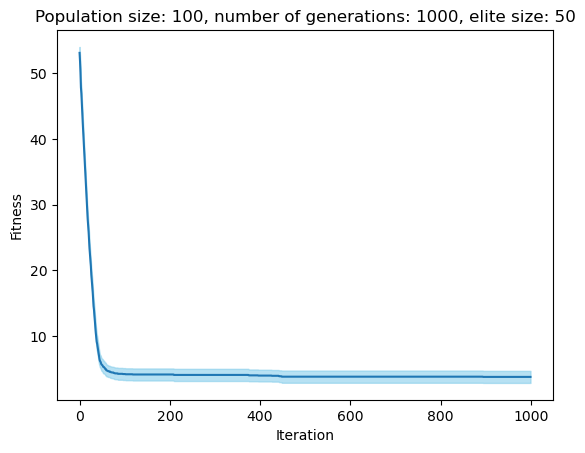

Population size: 100, number of generations: 1000, elite size: 10, Percentage solved: 56.67 %


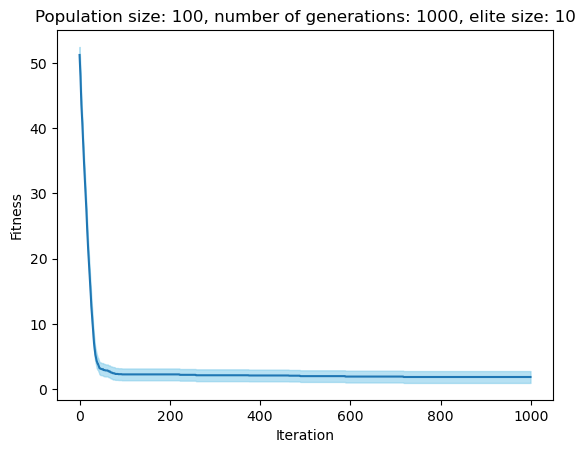

Population size: 1000, number of generations: 100, elite size: 100, Percentage solved: 100.0 %


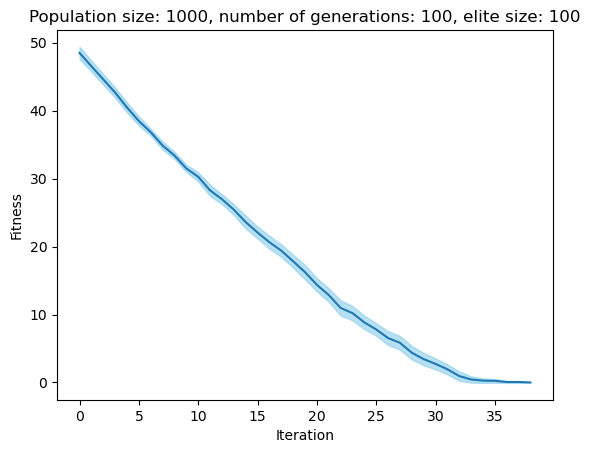

Population size: 1000, number of generations: 100, elite size: 300, Percentage solved: 100.0 %


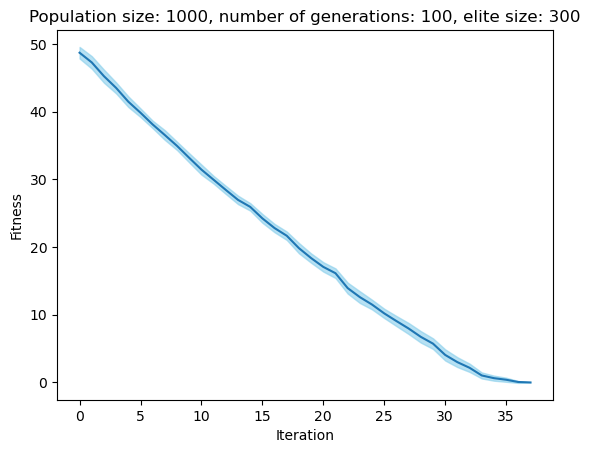

Population size: 500, number of generations: 200, elite size: 100, Percentage solved: 93.33 %


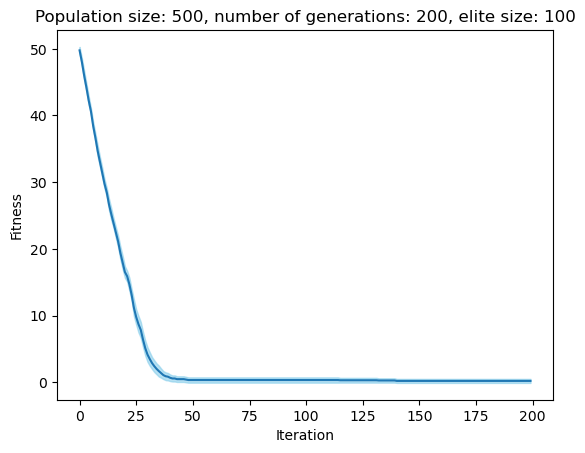

Population size: 500, number of generations: 200, elite size: 200, Percentage solved: 96.67 %


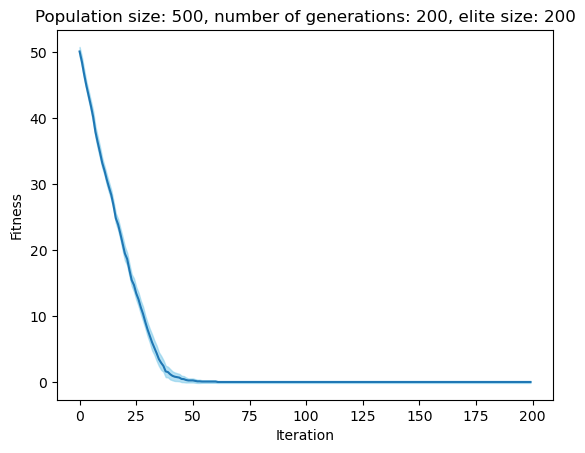

In [75]:
for j in gens_size_elite:
    hist = [i[0] for i in history_dict[j]]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"Population size: {j[0]}, number of generations: {j[1]}, elite size: {j[2]}, Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)
    t_st = t.ppf(0.975, 29)
    df['CI_low'] = df['mean'] - t_st*df['std']/np.sqrt(29)
    df['CI_high'] = df['mean'] + t_st*df['std']/np.sqrt(29)
    plt.fill_between(df.index, df['CI_low'], df['CI_high'], color='skyblue', alpha=.6)
    plt.plot(df['mean'])
    plt.title(f"Population size: {j[0]}, number of generations: {j[1]}, elite size: {j[2]}")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()

In [77]:
gens_size_elite = [(100, 1000, 20), #size, gens, elite
                  (100, 1000, 50),
                  (100, 1000, 10),
                  (1000, 100, 100),
                  (1000, 100, 300),
                  (500, 200, 100),
                  (500, 200, 200),
                  ]

pairs = list(itertools.combinations(gens_size_elite,2))

# take data from last run
df_last_step = pd.DataFrame(columns= gens_size_elite )
for j in gens_size_elite:
    hist = [i[0] for i in history_dict[j]]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    df_last_step[j] = df.iloc[-1]


for i in pairs:
    t_stat, p_value = stats.ttest_ind(df_last_step[i[0]], df_last_step[i[1]], equal_var=False)

    print(f"Test means equality for {i[0]} and {i[1]}")
    print("t-statistic:", np.round(t_stat,3))
    print("p-value:", np.round(p_value,4))
    if p_value < 0.05:
        print(f"Statistically significant difference between {i[0]} and {i[1]}")
    print('\n')

Test means equality for (100, 1000, 20) and (100, 1000, 50)
t-statistic: -2.166
p-value: 0.0344
Statistically significant difference between (100, 1000, 20) and (100, 1000, 50)


Test means equality for (100, 1000, 20) and (100, 1000, 10)
t-statistic: 1.033
p-value: 0.3059


Test means equality for (100, 1000, 20) and (1000, 100, 100)
t-statistic: 5.913
p-value: 0.0
Statistically significant difference between (100, 1000, 20) and (1000, 100, 100)


Test means equality for (100, 1000, 20) and (1000, 100, 300)
t-statistic: 5.913
p-value: 0.0
Statistically significant difference between (100, 1000, 20) and (1000, 100, 300)


Test means equality for (100, 1000, 20) and (500, 200, 100)
t-statistic: 5.139
p-value: 0.0
Statistically significant difference between (100, 1000, 20) and (500, 200, 100)


Test means equality for (100, 1000, 20) and (500, 200, 200)
t-statistic: 5.685
p-value: 0.0
Statistically significant difference between (100, 1000, 20) and (500, 200, 200)


Test means equality 

Welch's T-test results state that there is no statistically significant difference between several best configurations, that is why we will rely more on the speed of convergence

Population size: 500, number of generations: 200, elite size: 200 seems as the best configuration.

Only once it didn't solve the puzzle, however, 29 other times it was twice faster then with population size 1000

### Test different boards

In [54]:
boards = [(easy_board, 'easy'),
         (medium_board, 'medium'),
         (hard_board,'hard'),
         (expert_board, 'expert')]

history_dict = {}
for j in boards:
    histories = []
    for i in tqdm(range(30)):
        start_time = time.time()

        population = pop.Population(size=500, initial_board=j[0])
        population.evolve(
            gens = 200,
            mut_prob = 0.9,
            xo_prob = 0.9,
            select_type = 'roulette',
            xo = 'single_point_tabular',
            mutation = 'change-smart',
            elite_size = 200,
            swap_number = 1,
            direction = 'random',
            diversify = 'fitness-sharing',
            verbose= False,
            plateau_threshold=20,
            invert_distances=True,
            normalize_distances=False
        )
        end_time = time.time()
        elapsed_time = end_time - start_time
        histories.append((population.history, elapsed_time))
    history_dict[j[1]] = histories

  3%|▎         | 1/30 [00:14<07:07, 14.73s/it]

Solution found in generation 38!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  7%|▋         | 2/30 [00:27<06:24, 13.74s/it]

Solution found in generation 34!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 10%|█         | 3/30 [00:43<06:39, 14.80s/it]

Solution found in generation 41!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 13%|█▎        | 4/30 [01:06<07:40, 17.73s/it]

Solution found in generation 54!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 17%|█▋        | 5/30 [01:21<07:05, 17.02s/it]

Solution found in generation 40!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 20%|██        | 6/30 [01:36<06:30, 16.28s/it]

Solution found in generation 38!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 23%|██▎       | 7/30 [01:52<06:10, 16.11s/it]

Solution found in generation 40!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 27%|██▋       | 8/30 [02:07<05:44, 15.65s/it]

Solution found in generation 38!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 37%|███▋      | 11/30 [05:51<15:11, 47.96s/it]

Solution found in generation 42!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 40%|████      | 12/30 [06:07<11:32, 38.47s/it]

Solution found in generation 43!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 43%|████▎     | 13/30 [06:19<08:35, 30.33s/it]

Solution found in generation 30!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 47%|████▋     | 14/30 [06:33<06:45, 25.35s/it]

Solution found in generation 35!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 50%|█████     | 15/30 [06:50<05:40, 22.73s/it]

Solution found in generation 41!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 53%|█████▎    | 16/30 [07:02<04:36, 19.76s/it]

Solution found in generation 33!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 57%|█████▋    | 17/30 [07:18<04:01, 18.59s/it]

Solution found in generation 40!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 60%|██████    | 18/30 [07:35<03:36, 18.08s/it]

Solution found in generation 43!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 63%|██████▎   | 19/30 [07:47<02:59, 16.30s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 67%|██████▋   | 20/30 [08:05<02:46, 16.66s/it]

Solution found in generation 44!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 70%|███████   | 21/30 [08:21<02:29, 16.64s/it]

Solution found in generation 42!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 73%|███████▎  | 22/30 [08:37<02:09, 16.21s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 77%|███████▋  | 23/30 [08:54<01:55, 16.44s/it]

Solution found in generation 43!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 80%|████████  | 24/30 [09:09<01:36, 16.03s/it]

Solution found in generation 39!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 83%|████████▎ | 25/30 [09:27<01:23, 16.64s/it]

Solution found in generation 46!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 87%|████████▋ | 26/30 [09:45<01:07, 16.98s/it]

Solution found in generation 45!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 90%|█████████ | 27/30 [10:00<00:49, 16.54s/it]

Solution found in generation 40!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 93%|█████████▎| 28/30 [10:13<00:30, 15.33s/it]

Solution found in generation 32!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


 97%|█████████▋| 29/30 [10:28<00:15, 15.33s/it]

Solution found in generation 40!

 9  1  3  |  8  6  5  |  4  2  7 
 6  8  7  |  2  4  3  |  9  1  5 
 2  5  4  |  7  9  1  |  6  8  3 
--------|----------|--------
 4  7  9  |  5  8  6  |  1  3  2 
 1  6  2  |  4  3  7  |  5  9  8 
 5  3  8  |  9  1  2  |  7  6  4 
--------|----------|--------
 3  4  5  |  6  2  9  |  8  7  1 
 8  9  1  |  3  7  4  |  2  5  6 
 7  2  6  |  1  5  8  |  3  4  9 


  3%|▎         | 1/30 [00:21<10:10, 21.04s/it]

Solution found in generation 51!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


  7%|▋         | 2/30 [00:36<08:17, 17.76s/it]

Solution found in generation 39!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


 10%|█         | 3/30 [00:53<07:44, 17.19s/it]

Solution found in generation 42!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


 13%|█▎        | 4/30 [01:50<14:21, 33.15s/it]

Solution found in generation 117!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


 23%|██▎       | 7/30 [05:35<21:24, 55.83s/it]

Solution found in generation 48!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


 30%|███       | 9/30 [07:32<18:34, 53.06s/it]

Solution found in generation 37!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


 33%|███▎      | 10/30 [07:51<14:09, 42.48s/it]

Solution found in generation 47!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


 40%|████      | 12/30 [09:51<14:23, 47.99s/it]

Solution found in generation 47!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


 43%|████▎     | 13/30 [10:06<10:43, 37.86s/it]

Solution found in generation 36!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


 47%|████▋     | 14/30 [10:24<08:29, 31.84s/it]

Solution found in generation 45!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


 50%|█████     | 15/30 [10:46<07:16, 29.08s/it]

Solution found in generation 55!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


 57%|█████▋    | 17/30 [12:48<08:58, 41.43s/it]

Solution found in generation 44!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


 67%|██████▋   | 20/30 [16:37<09:39, 57.97s/it]

Solution found in generation 59!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


 70%|███████   | 21/30 [16:52<06:45, 45.02s/it]

Solution found in generation 38!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


 73%|███████▎  | 22/30 [17:12<05:00, 37.53s/it]

Solution found in generation 50!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


 80%|████████  | 24/30 [19:16<04:37, 46.17s/it]

Solution found in generation 50!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


 83%|████████▎ | 25/30 [19:33<03:07, 37.54s/it]

Solution found in generation 44!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


 87%|████████▋ | 26/30 [19:50<02:05, 31.34s/it]

Solution found in generation 43!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


 90%|█████████ | 27/30 [20:06<01:20, 26.70s/it]

Solution found in generation 40!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


 97%|█████████▋| 29/30 [22:07<00:40, 40.09s/it]

Solution found in generation 45!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


100%|██████████| 30/30 [22:24<00:00, 44.82s/it]


Solution found in generation 44!

 6  3  8  |  1  9  7  |  2  5  4 
 9  5  1  |  3  4  2  |  6  8  7 
 4  7  2  |  5  6  8  |  9  1  3 
--------|----------|--------
 7  4  6  |  2  1  9  |  5  3  8 
 5  8  9  |  7  3  4  |  1  6  2 
 1  2  3  |  6  8  5  |  4  7  9 
--------|----------|--------
 8  1  7  |  9  2  6  |  3  4  5 
 3  9  4  |  8  5  1  |  7  2  6 
 2  6  5  |  4  7  3  |  8  9  1 


 10%|█         | 3/30 [03:47<29:23, 65.30s/it] 

Solution found in generation 45!

 7  2  9  |  3  1  4  |  8  5  6 
 1  6  5  |  7  2  8  |  3  9  4 
 4  8  3  |  9  6  5  |  2  1  7 
--------|----------|--------
 8  4  1  |  5  3  9  |  7  6  2 
 6  9  7  |  8  4  2  |  5  3  1 
 5  3  2  |  6  7  1  |  4  8  9 
--------|----------|--------
 9  7  4  |  1  8  3  |  6  2  5 
 2  5  8  |  4  9  6  |  1  7  3 
 3  1  6  |  2  5  7  |  9  4  8 


 13%|█▎        | 4/30 [04:07<20:34, 47.48s/it]

Solution found in generation 50!

 7  2  9  |  3  1  4  |  8  5  6 
 1  6  5  |  7  2  8  |  3  9  4 
 4  8  3  |  9  6  5  |  2  1  7 
--------|----------|--------
 8  4  1  |  5  3  9  |  7  6  2 
 6  9  7  |  8  4  2  |  5  3  1 
 5  3  2  |  6  7  1  |  4  8  9 
--------|----------|--------
 9  7  4  |  1  8  3  |  6  2  5 
 2  5  8  |  4  9  6  |  1  7  3 
 3  1  6  |  2  5  7  |  9  4  8 


 17%|█▋        | 5/30 [04:27<15:34, 37.39s/it]

Solution found in generation 48!

 7  2  9  |  3  1  4  |  8  5  6 
 1  6  5  |  7  2  8  |  3  9  4 
 4  8  3  |  9  6  5  |  2  1  7 
--------|----------|--------
 8  4  1  |  5  3  9  |  7  6  2 
 6  9  7  |  8  4  2  |  5  3  1 
 5  3  2  |  6  7  1  |  4  8  9 
--------|----------|--------
 9  7  4  |  1  8  3  |  6  2  5 
 2  5  8  |  4  9  6  |  1  7  3 
 3  1  6  |  2  5  7  |  9  4  8 


 20%|██        | 6/30 [04:55<13:43, 34.32s/it]

Solution found in generation 67!

 7  2  9  |  3  1  4  |  8  5  6 
 1  6  5  |  7  2  8  |  3  9  4 
 4  8  3  |  9  6  5  |  2  1  7 
--------|----------|--------
 8  4  1  |  5  3  9  |  7  6  2 
 6  9  7  |  8  4  2  |  5  3  1 
 5  3  2  |  6  7  1  |  4  8  9 
--------|----------|--------
 9  7  4  |  1  8  3  |  6  2  5 
 2  5  8  |  4  9  6  |  1  7  3 
 3  1  6  |  2  5  7  |  9  4  8 


 23%|██▎       | 7/30 [05:16<11:29, 29.97s/it]

Solution found in generation 52!

 7  2  9  |  3  1  4  |  8  5  6 
 1  6  5  |  7  2  8  |  3  9  4 
 4  8  3  |  9  6  5  |  2  1  7 
--------|----------|--------
 8  4  1  |  5  3  9  |  7  6  2 
 6  9  7  |  8  4  2  |  5  3  1 
 5  3  2  |  6  7  1  |  4  8  9 
--------|----------|--------
 9  7  4  |  1  8  3  |  6  2  5 
 2  5  8  |  4  9  6  |  1  7  3 
 3  1  6  |  2  5  7  |  9  4  8 


 27%|██▋       | 8/30 [05:37<09:54, 27.02s/it]

Solution found in generation 51!

 7  2  9  |  3  1  4  |  8  5  6 
 1  6  5  |  7  2  8  |  3  9  4 
 4  8  3  |  9  6  5  |  2  1  7 
--------|----------|--------
 8  4  1  |  5  3  9  |  7  6  2 
 6  9  7  |  8  4  2  |  5  3  1 
 5  3  2  |  6  7  1  |  4  8  9 
--------|----------|--------
 9  7  4  |  1  8  3  |  6  2  5 
 2  5  8  |  4  9  6  |  1  7  3 
 3  1  6  |  2  5  7  |  9  4  8 


 57%|█████▋    | 17/30 [19:50<16:19, 75.31s/it]

Solution found in generation 46!

 7  2  9  |  3  1  4  |  8  5  6 
 1  6  5  |  7  2  8  |  3  9  4 
 4  8  3  |  9  6  5  |  2  1  7 
--------|----------|--------
 8  4  1  |  5  3  9  |  7  6  2 
 6  9  7  |  8  4  2  |  5  3  1 
 5  3  2  |  6  7  1  |  4  8  9 
--------|----------|--------
 9  7  4  |  1  8  3  |  6  2  5 
 2  5  8  |  4  9  6  |  1  7  3 
 3  1  6  |  2  5  7  |  9  4  8 


 83%|████████▎ | 25/30 [32:39<06:52, 82.42s/it] 

Solution found in generation 73!

 7  2  9  |  3  1  4  |  8  5  6 
 1  6  5  |  7  2  8  |  3  9  4 
 4  8  3  |  9  6  5  |  2  1  7 
--------|----------|--------
 8  4  1  |  5  3  9  |  7  6  2 
 6  9  7  |  8  4  2  |  5  3  1 
 5  3  2  |  6  7  1  |  4  8  9 
--------|----------|--------
 9  7  4  |  1  8  3  |  6  2  5 
 2  5  8  |  4  9  6  |  1  7  3 
 3  1  6  |  2  5  7  |  9  4  8 


 83%|████████▎ | 25/30 [43:31<06:51, 82.30s/it] 

Solution found in generation 56!

 7  2  6  |  9  4  3  |  5  1  8 
 9  5  1  |  8  6  2  |  3  4  7 
 4  8  3  |  5  1  7  |  2  6  9 
--------|----------|--------
 6  3  7  |  2  8  5  |  4  9  1 
 8  4  9  |  1  3  6  |  7  2  5 
 5  1  2  |  4  7  9  |  8  3  6 
--------|----------|--------
 3  6  5  |  7  9  4  |  1  8  2 
 2  9  8  |  3  5  1  |  6  7  4 
 1  7  4  |  6  2  8  |  9  5  3 


100%|██████████| 30/30 [52:40<00:00, 105.36s/it]


In [55]:
file_name = 'test_boards.pkl'

with open(file_name, 'wb') as file:
    pickle.dump(history_dict, file)

In [78]:
file_name = 'Runs history/test_boards.pkl'
with open(file_name, 'rb') as file:
    history_dict = pickle.load(file)

In [80]:
boards = [(easy_board, 'easy'),
         (medium_board, 'medium'),
         (hard_board,'hard'),
         (expert_board, 'expert')]

for j in boards:
    hist = [i[0] for i in history_dict[j[1]]]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    solved = np.where(df.iloc[-1] == 0)
    print(f"Difficulty: {j[1]}")
    print(f"Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)
    t_st = t.ppf(0.975, 29)
    df['CI_low'] = df['mean'] - t_st*df['std']/np.sqrt(29)
    df['CI_high'] = df['mean'] + t_st*df['std']/np.sqrt(29)
    print(f"Mean fitness at the end of run: {np.round(df['mean'].iloc[-1],2)}, 95% CI: [{np.round(df['CI_low'].iloc[-1],2)}, {np.round(df['CI_high'].iloc[-1],2)}]")
    times = np.array([i[1] for i in history_dict[j[1]]])
    print(f"Mean time per run: {np.round(np.mean(times),2)}")
    print(f"Mean time per successful run: {np.round(np.mean(times[solved]),2)}, number of successful runs: {len(times[solved])}")
    print("\n")

Difficulty: easy
Percentage solved: 90.0 %
Mean fitness at the end of run: 0.27, 95% CI: [-0.06, 0.59]
Mean time per run: 24.36
Mean time per successful run: 15.58, number of successful runs: 27


Difficulty: medium
Percentage solved: 70.0 %
Mean fitness at the end of run: 0.77, 95% CI: [0.29, 1.24]
Mean time per run: 44.82
Mean time per successful run: 20.02, number of successful runs: 21


Difficulty: hard
Percentage solved: 26.67 %
Mean fitness at the end of run: 1.57, 95% CI: [1.18, 1.96]
Mean time per run: 83.18
Mean time per successful run: 22.57, number of successful runs: 8


Difficulty: expert
Percentage solved: 3.33 %
Mean fitness at the end of run: 2.3, 95% CI: [1.97, 2.63]
Mean time per run: 105.36
Mean time per successful run: 23.46, number of successful runs: 1




Difficulty: easy, Percentage solved: 90.0 %


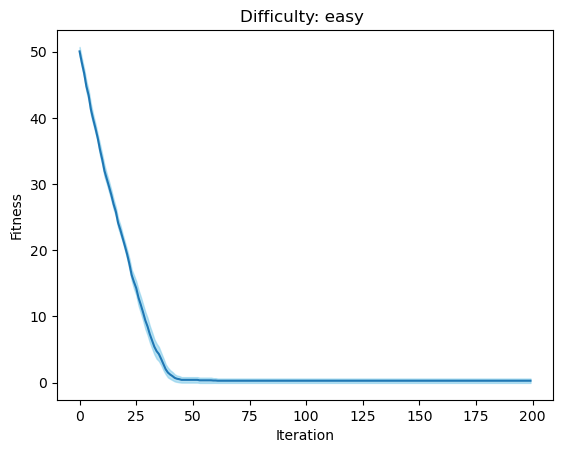

Difficulty: medium, Percentage solved: 70.0 %


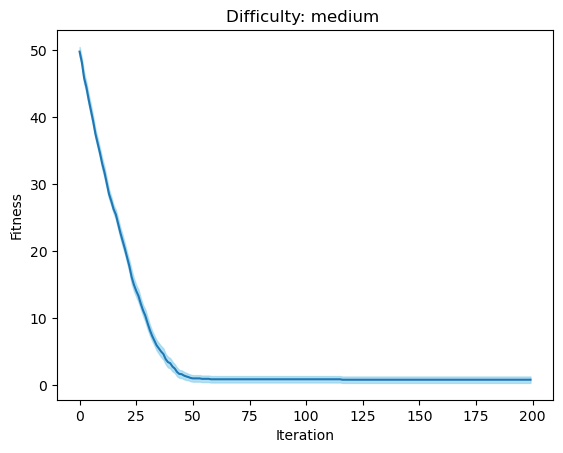

Difficulty: hard, Percentage solved: 26.67 %


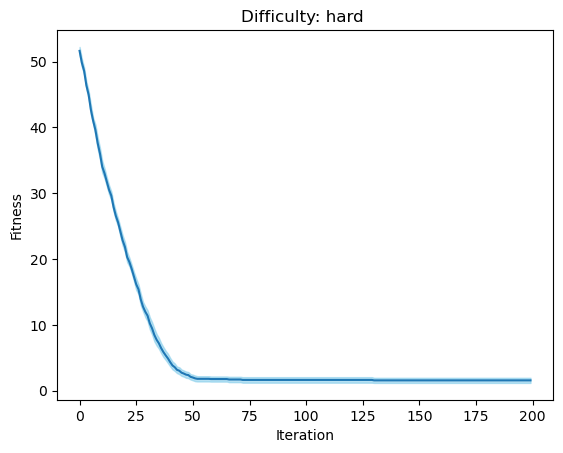

Difficulty: expert, Percentage solved: 3.33 %


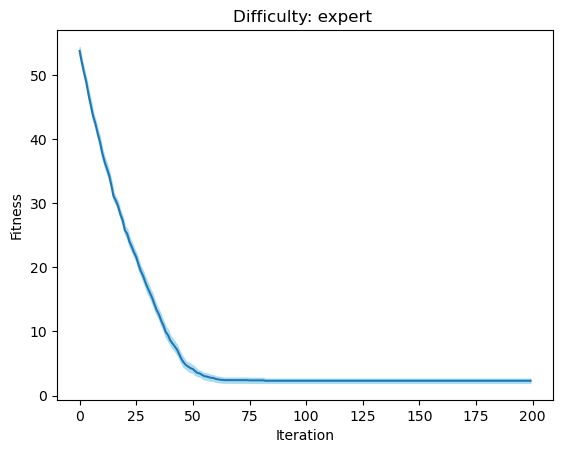

In [81]:
for j in boards:
    hist = [i[0] for i in history_dict[j[1]]]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"Difficulty: {j[1]}, Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)
    t_st = t.ppf(0.975, 29)
    df['CI_low'] = df['mean'] - t_st*df['std']/np.sqrt(29)
    df['CI_high'] = df['mean'] + t_st*df['std']/np.sqrt(29)
    plt.fill_between(df.index, df['CI_low'], df['CI_high'], color='skyblue', alpha=.6)
    plt.plot(df['mean'])
    plt.title(f"Difficulty: {j[1]} ")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()

Algorithms was able to solve each level of difficulty ay least once, while an easy and medium board were solved in >50% run.

Even with the hardest boards algorithm, in most cases, converged to a fitnesses around 2, meaning that it is stuck with the local optimum that almost solves the board